<strong><font color=green> **** Note:  All the inferences are written in green

# Steps taken:
**1. Data Cleaning**
- Checking missing values
- Filling missing values with 0 wherever required
- Dropping column with high missing values
- Dropping column with high skewness

**2. Filtering HVC**

**3. Deriving 'Churn'**

**4. Imputing Missing values**
- Imputing missing values using KNN Imputer

**5. Creating Derived variables**

**6. Exploratory Data Analysis**
- Analyzing 8th month variables with Churn variable
- Checking correlation and dropping highly correlated variables
- Outliers detection

**7. Data Preparation**
- Dummy encoding the vategorical variables
- Train and Test split
- Performing power transformer as outlier treatment
- Standardizing the variables
- Using RFE for feature selection

**8. Model Building**
- ***Part1 - Interpretable model(XGBoost)***
- Building model using default parameters
- Building model using GridSearch parameters
- Analyzing Feature importance
- Finding optimal threshold
- Predicting Test data set
- ***Part2 - High performance models***
- Standardizing the variables
- Plotting scree plot
- Performing PCA
- ***Building models after performing PCA***
- Logistic Regression model
- Random Forest Model
- Decision Tree model
- Support Vector Machines - Classifier
- XGBoost model

# Import relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.pyplot import rcParams
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Setting display options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

# Importing the data

In [ ]:
# Importing the dataset

tele = pd.read_csv(r'Data/telecom_churn_data.csv')

In [ ]:
# Checking the head of the data set

tele.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
# Checking the shape of the data set

tele.shape

(99999, 226)

In [ ]:
# Looking at info of columns

tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
# Checking for outliers, central tendency and variance of numerical columns in the data

tele.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
95%               0.0    829.488200    828.357200    833.303300    805.107200   
99%               0.0   1410.792540   1428.685880   1455.539960   1402.445660   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
95%      612.407500    624.835500    620.690000    617.232500    727.879000   
99%     1431.760500   1478.533300   1480.334000   1445.766400   1539.535800   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
95%      744.225000    734.860000    720.120500      40.640000      23.140000   
99%     1549.379500   1530.398000   1521.328700     219.847000     154.483200   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        24.460000      19.240000      69.110000      42.9900

# 1. Data Cleaning

In [ ]:
# Checking for duplicates

tele.duplicated().sum()

0

<strong><font color=green>There are no duplicate rows

- **Checking Missing vales across the columns**

In [ ]:
# Checking for missing values

tele.isnull().sum()/len(tele.index)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [ ]:
len(tele.columns[100*(tele.isnull().sum())/tele.shape[0]>0])

166

In [ ]:
len(tele.columns[100*(tele.isnull().sum())/tele.shape[0]>70])

40

<strong><font color= green>
- Out of 226 columns, 166 are having some missing data
- Out of which 40 have more then 70% of missing values
</font></strong>

Before droping any column let's first check whether those missing are actual missing or meaningful missing and can be imputed by some value

- **Analyzing data recharge columns**

In [ ]:
col = ['date_of_last_rech_data_6', 'total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6',
       'date_of_last_rech_data_7', 'total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7',
       'date_of_last_rech_data_8', 'total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8',
       'date_of_last_rech_data_9', 'total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9']


In [ ]:
for var in col:
    print('*************  ' + var + '  *************')
    print(100*tele[var].value_counts(normalize=True,dropna=False).head())
    print('\n\n')

*************  date_of_last_rech_data_6  *************
NaN          74.846748
6/30/2014     1.888019
6/29/2014     1.651017
6/28/2014     1.643016
6/26/2014     1.384014
Name: date_of_last_rech_data_6, dtype: float64



*************  total_rech_data_6  *************
NaN    74.846748
1.0    13.309133
2.0     5.186052
3.0     2.065021
4.0     1.335013
Name: total_rech_data_6, dtype: float64



*************  max_rech_data_6  *************
NaN      74.846748
154.0     4.900049
25.0      4.402044
252.0     3.144031
98.0      1.441014
Name: max_rech_data_6, dtype: float64



*************  count_rech_2g_6  *************
NaN    74.846748
1.0    10.902109
0.0     5.920059
2.0     3.240032
3.0     1.461015
Name: count_rech_2g_6, dtype: float64



*************  count_rech_3g_6  *************
NaN    74.846748
0.0    15.788158
1.0     6.742067
2.0     1.541015
3.0     0.514005
Name: count_rech_3g_6, dtype: float64



*************  av_rech_amt_data_6  *************
NaN      74.846748
154.0     

What is value for other columns when data recharge date is missing?

In [ ]:
tele[col].describe()

total_rech_data_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  \
count       25153.000000     25153.000000     25153.000000     25153.000000   
mean            2.463802       126.393392         1.864668         0.599133   
std             2.789128       108.477235         2.570254         1.274428   
min             1.000000         1.000000         0.000000         0.000000   
25%             1.000000        25.000000         1.000000         0.000000   
50%             1.000000       145.000000         1.000000         0.000000   
75%             3.000000       177.000000         2.000000         1.000000   
max            61.000000      1555.000000        42.000000        29.000000   

       av_rech_amt_data_6     arpu_3g_6     arpu_2g_6  total_rech_data_7  \
count        25153.000000  25153.000000  25153.000000       25571.000000   
mean           192.600982     89.555057     86.398003           2.666419   
std            192.646318    193.124653    172.767523           3.031593   
min              1.000000    -30.820000    -35.830000           1.000000   
25%             82.000000      0.000000      0.000000           1.000000   
50%            154.000000      0.480000     10.830000           1.000000   
75%            252.000000    122.070000    122.070000           3.000000   
max           7546.000000   6362.280000   6433.760000          54.000000   

       max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  \
count     25571.000000     25571.000000     25571.000000        25571.000000   
mean        126.729459         2.044699         0.621720          200.981292   
std         109.765267         2.768332         1.394524          196.791224   
min           1.000000         0.000000         0.000000            0.500000   
25%          25.000000         1.000000         0.000000           92.000000   
50%         145.000000         1.000000         0.000000          154.000000   
75%         177.000000         2.000000         1.000000          252.000000   
max        1555.000000        48.000000        35.000000         4365.000000   

          arpu_3g_7     arpu_2g_7  total_rech_data_8  max_rech_data_8  \
count  25571.000000  25571.000000       26339.000000     26339.000000   
mean      89.384120     85.914450           2.651999       125.717301   
std      195.893924    176.379871           3.074987       109.437851   
min      -26.040000    -15.480000           1.000000         1.000000   
25%        0.000000      0.000000           1.000000        25.000000   
50%        0.420000      8.810000           1.000000       145.000000   
75%      119.560000    122.070000           3.000000       179.000000   
max     4980.900000   4809.360000          60.000000      1555.000000   

       count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8     arpu_3g_8  \
count     26339.000000     26339.000000        26339.000000  26339.000000   
mean          2.016288         0.635711          197.526489     91.173849   
std           2.720132         1.422827          191.301305    188.180936   
min           0.000000         0.000000            0.500000    -24.490000   
25%           1.000000         0.000000           87.000000      0.000000   
50%           1.000000         0.000000          154.000000      0.880000   
75%           2.000000         1.000000          252.000000    122.070000   
max          44.000000        45.000000         4076.000000   3716.900000   

          arpu_2g_8  total_rech_data_9  max_rech_data_9  count_rech_2g_9  \
count  26339.000000       25922.000000      25922.00000     25922.000000   
mean      86.599478           2.441170        124.94144         1.781807   
std      168.247852           2.516339        111.36376         2.214701   
min      -55.830000           1.000000          1.00000         0.000000   
25%        0.000000           1.000000         25.00000         1.000000   
50%        9.270000           2.000000        145.00000         1.000000   
75%  

<strong><font color= green>
Observations
- Missing value count for 'date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'arpu_3g' and 'arpu_2g'  are exactly same for respective months
- Now missing of recharge date could mean that customer has not done internet recharge in that month
- So other variables like total recharge, max recharge, avg revenue per user etc are also missing for those customers
    
Imputation
- As missing data here signifies that no recharge has been done. So we can safely impute NA with 0 in this case.
- Dates cannot be imputed, so we can drop those columns
</font></strong>

In [ ]:
rech_date_cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                 'date_of_last_rech_data_8','date_of_last_rech_data_9']

In [ ]:
tele.drop(columns=rech_date_cols,inplace=True)

In [ ]:
cols = [i for i in col if i not in rech_date_cols]

In [ ]:
for var in cols:
    tele[var].fillna(0,inplace=True)

- **Dropping high missing value columns**

In [ ]:
na_vars = tele.columns[100*(tele.isnull().sum())/tele.shape[0]>70].to_list()
print(na_vars)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [ ]:
tele = tele.drop(na_vars, axis=1)

- **Drop date,mobile number and id columns**

In [ ]:
tele = tele.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                  'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9',
                  'circle_id','mobile_number'], axis = 1)
tele.shape

(99999, 204)

- **Dropping highly skewed variables i.e. any categorical or discrete variables having more than 85% data points in particular category**

In [ ]:
skew_num = []

num_vars = tele.columns

for var in num_vars:
    if 100*tele[var].value_counts(normalize=True).values[0] > 85:
        skew_num.append(var)
skew_num.sort()
var = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
skew_nums = [i for i in skew_num if i not in var]
print(skew_nums, end='')

['arpu_3g_6', 'arpu_3g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_9', 'og_others_7', 'og_others_8', 'og_others_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'sachet_3g_9', 'sep_vbc_3g', 'spl_ic_mou_7', 'spl_ic_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2o_mou', 'vol_3g_mb_6']

<strong><font color=green>
- They all are having skewed data.
- They all have one category which is dominant than the others, with more than 85% data in that category.
- So we need to drop these variables.</font></strong>

In [ ]:
tele.drop(skew_nums, axis=1, inplace=True)

In [ ]:
tele.shape

(99999, 160)

# 2. Filtering HVC

- **Filtering High Value Customers (HVC)**

In [ ]:
# Creating new column by taking average of total recharge fro month 6 and month 7

tele['avg_amt_6_7'] = (tele['total_rech_amt_6']+tele['total_rech_amt_7'])/2

In [ ]:
# Checking head after creation of new column

tele.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00            0.0           0.00   
2            0.0           0.00           0.00            0.0           0.00   
3            0.0          54.86          44.38            0.0          28.09   
4            0.0           0.00           0.00            0.0           0.00   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2           0.00              7.19             28.74             13.58   
3          39.04             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0               NaN           NaN           NaN          0.00           NaN   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48         60.66         67.41         67.66         64.81   
3              0.00        183.03        118.68         37.99         83.03   
4              0.00        117.96        241.33        208.16         98.61   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.23              4.11              0.00              0.00   
2              4.34             26.49             22.58  

In [ ]:
# Filtering high value customers taking 70th percentile as a theshold

hvc = tele.loc[tele['avg_amt_6_7']>=tele['avg_amt_6_7'].quantile(q=0.7), :].copy()
hvc.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7            NaN          16.23          33.49          31.64          23.74   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11           7.98   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7           12.59          38.06             51.39             31.38   
8            0.00           0.00            297.13            217.59   
13          35.26           1.44             49.63              6.19   
16          17.74           0.00             42.61             65.16   
17           8.46          13.34             38.99              0.00   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              40.28               NaN            308.63            447.38   
8              12.49             26.13             80.96             70.58   
13             36.01              6.14            151.13             47.28   
16             67.38             26.88            273.29            145.99   
17              0.00             36.41             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             162.28               NaN             62.13             55.14   
8              50.54             34.58              0.00              0.00   
13            294.46            108.24              4.54              0.00   
16            128.28            201.49              0.00              4.48   
17              0.00              9.38              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              53.23               NaN               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13             23.51              5.29               0.0               0.0   
16             10.26              4.66               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
7               0.00               NaN        422.16        533.91   
8               7.15               0.0        378.09        288.18   
13              0.49               0.0        205.31         53.48   
16              0.00               0.0        315.91        215.64   
17              0.00               0.0         97.54          0.00   

    loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         255.79           NaN              4.30             23.29   
8          63.04         60.71            116.56            133.43   
13        353.99        119.69            446.41             85.98   
16        205.93        233.04              7.89              2.58   
17          0.00         45.79           1

In [ ]:
# Dropping the 'avg_amt_6_7' variable as it is not required now

hvc.drop('avg_amt_6_7', axis=1, inplace=True)

In [ ]:
# Checking shape of resultant data frame

hvc.shape

(30011, 160)

# 3. Deriving 'Churn'

#### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:
#### Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
##### total_ic_mou_9, total_og_mou_9,  vol_2g_mb_9,  vol_3g_mb_9

In [ ]:
hvc['churn'] = hvc.apply(lambda row: 1 if (row.total_og_mou_9 == 0 and row.total_ic_mou_9 == 0
                                                      and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0
                                                      ) else 0, axis=1)


In [ ]:
hvc.churn.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [ ]:
# change data type to category
hvc.churn = hvc.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(hvc.churn.value_counts(normalize=True))

Churn Ratio:
0    0.913598
1    0.086402
Name: churn, dtype: float64


In [ ]:
# Dropping columns related to month 9

month_9_cols =[ i for i in hvc.columns if i[-2:]=='_9']

In [ ]:
hvc.drop(labels=month_9_cols, axis=1, inplace=True)
hvc.shape

(30011, 124)

<strong><font color=green> We started with 226 variables, now we are left with 124 only.

# 4. Missing value imputation

In [ ]:
(100*hvc.isnull().sum()/hvc.shape[0]).sort_values(ascending=False)

loc_ic_t2t_mou_8      3.125521
roam_og_mou_8         3.125521
std_og_mou_8          3.125521
std_og_t2t_mou_8      3.125521
spl_og_mou_8          3.125521
loc_og_mou_8          3.125521
ic_others_8           3.125521
loc_og_t2c_mou_8      3.125521
isd_ic_mou_8          3.125521
loc_og_t2f_mou_8      3.125521
loc_og_t2m_mou_8      3.125521
std_ic_mou_8          3.125521
std_og_t2m_mou_8      3.125521
std_ic_t2f_mou_8      3.125521
loc_og_t2t_mou_8      3.125521
std_ic_t2m_mou_8      3.125521
offnet_mou_8          3.125521
loc_ic_t2m_mou_8      3.125521
loc_ic_t2f_mou_8      3.125521
onnet_mou_8           3.125521
loc_ic_mou_8          3.125521
std_ic_t2t_mou_8      3.125521
roam_ic_mou_8         3.125521
std_ic_t2t_mou_6      1.052947
spl_ic_mou_6          1.052947
isd_ic_mou_6          1.052947
std_ic_t2f_mou_6      1.052947
ic_others_6           1.052947
loc_ic_mou_6          1.052947
std_ic_mou_6          1.052947
og_others_6           1.052947
loc_ic_t2f_mou_6      1.052947
spl_og_m

In [ ]:
len(hvc.columns[(100*hvc.isnull().sum()/hvc.shape[0])>0])

71

- **Imputing missing values using 'KNN'**

In [ ]:
hvc_knn = pd.DataFrame(KNN(k=3).fit_transform(hvc))
hvc_knn.columns = hvc.columns

Imputing row 1/30011 with 0 missing, elapsed time: 613.823
Imputing row 101/30011 with 23 missing, elapsed time: 613.924
Imputing row 201/30011 with 0 missing, elapsed time: 614.071
Imputing row 301/30011 with 0 missing, elapsed time: 614.173
Imputing row 401/30011 with 0 missing, elapsed time: 614.194
Imputing row 501/30011 with 0 missing, elapsed time: 614.262
Imputing row 601/30011 with 0 missing, elapsed time: 614.303
Imputing row 701/30011 with 0 missing, elapsed time: 614.336
Imputing row 801/30011 with 0 missing, elapsed time: 614.347
Imputing row 901/30011 with 0 missing, elapsed time: 614.387
Imputing row 1001/30011 with 0 missing, elapsed time: 614.387
Imputing row 1101/30011 with 0 missing, elapsed time: 614.495
Imputing row 1201/30011 with 0 missing, elapsed time: 614.569
Imputing row 1301/30011 with 0 missing, elapsed time: 614.586
Imputing row 1401/30011 with 0 missing, elapsed time: 614.605
Imputing row 1501/30011 with 0 missing, elapsed time: 614.630
Imputing row 1601/3

Imputing row 13301/30011 with 0 missing, elapsed time: 619.662
Imputing row 13401/30011 with 0 missing, elapsed time: 619.694
Imputing row 13501/30011 with 0 missing, elapsed time: 619.704
Imputing row 13601/30011 with 0 missing, elapsed time: 619.738
Imputing row 13701/30011 with 0 missing, elapsed time: 619.766
Imputing row 13801/30011 with 0 missing, elapsed time: 619.778
Imputing row 13901/30011 with 0 missing, elapsed time: 619.796
Imputing row 14001/30011 with 0 missing, elapsed time: 619.830
Imputing row 14101/30011 with 0 missing, elapsed time: 619.845
Imputing row 14201/30011 with 0 missing, elapsed time: 619.854
Imputing row 14301/30011 with 0 missing, elapsed time: 619.876
Imputing row 14401/30011 with 0 missing, elapsed time: 619.910
Imputing row 14501/30011 with 0 missing, elapsed time: 619.919
Imputing row 14601/30011 with 0 missing, elapsed time: 619.997
Imputing row 14701/30011 with 23 missing, elapsed time: 620.022
Imputing row 14801/30011 with 0 missing, elapsed time:

Imputing row 26901/30011 with 0 missing, elapsed time: 622.857
Imputing row 27001/30011 with 0 missing, elapsed time: 622.884
Imputing row 27101/30011 with 0 missing, elapsed time: 622.890
Imputing row 27201/30011 with 0 missing, elapsed time: 622.932
Imputing row 27301/30011 with 0 missing, elapsed time: 622.941
Imputing row 27401/30011 with 0 missing, elapsed time: 622.989
Imputing row 27501/30011 with 0 missing, elapsed time: 622.995
Imputing row 27601/30011 with 0 missing, elapsed time: 623.009
Imputing row 27701/30011 with 0 missing, elapsed time: 623.060
Imputing row 27801/30011 with 0 missing, elapsed time: 623.089
Imputing row 27901/30011 with 25 missing, elapsed time: 623.106
Imputing row 28001/30011 with 0 missing, elapsed time: 623.151
Imputing row 28101/30011 with 0 missing, elapsed time: 623.173
Imputing row 28201/30011 with 0 missing, elapsed time: 623.183
Imputing row 28301/30011 with 0 missing, elapsed time: 623.197
Imputing row 28401/30011 with 0 missing, elapsed time:

In [ ]:
len(hvc_knn.columns[(100*hvc_knn.isnull().sum()/hvc_knn.shape[0])>0])

0

# 5. Derived Variables

In [ ]:
hvc_knn.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1069.180  1349.850  3171.480        57.84        54.68        52.29   
1   378.721   492.223   137.362       413.69       351.03        35.08   
2   492.846   205.671   593.260       501.76       108.39       534.24   
3   430.975   299.869   187.894        50.51        74.01        70.61   
4   690.008    18.980    25.499      1185.91         9.28         7.79   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        453.43        567.16        325.91          16.23          33.49   
1         94.66         80.63        136.48           0.00           0.00   
2        413.31        119.28        482.46          23.53         144.24   
3        296.29        229.74        162.76           0.00           2.83   
4         61.64          0.00          5.54           0.00           4.76   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          31.64          23.74          12.59          38.06   
1           0.00           0.00           0.00           0.00   
2          72.11           7.98          35.26           1.44   
3           0.00           0.00          17.74           0.00   
4           4.81           0.00           8.46          13.34   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             51.39             31.38             40.28            308.63   
1            297.13            217.59             12.49             80.96   
2             49.63              6.19             36.01            151.13   
3             42.61             65.16             67.38            273.29   
4             38.99              0.00              0.00             58.54   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            447.38            162.28             62.13             55.14   
1             70.58             50.54              0.00              0.00   
2             47.28            294.46              4.54              0.00   
3            145.99            128.28              0.00              4.48   
4              0.00              0.00              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             53.23               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2             23.51               0.0               0.0              0.49   
3             10.26               0.0               0.0              0.00   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        422.16        533.91        255.79              4.30   
1        378.09        288.18         63.04            116.56   
2        205.31         53.48        353.99            446.41   
3        315.91        215.64        205.93              7.89   
4         97.54          0.00          0.00           1146.91   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             23.29             12.01             49.89             31.76   
1            133.43             22.58             13.69             10.04   
2             85.98            498.23            255.36             52.94   
3              2.58              3.23             22.99             64.51   
4              0.81              0.00              1.55              0.00   

   std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  \
0             49.14         60.86         75.14         77.84          4.50   
1             75.69        130.26        143.48         98.28          0.00   
2            156.94        701.78        138.93        655.18          0.00   
3             18.29         30.89         67.09         21.53          0.00   
4              0.00       1148.46          0.81          0.00       

In [ ]:
hvc_knn.shape

(30011, 124)

Average recharge amount done by customer in month 6,7 and 8

In [ ]:
# avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8
for i in range(6,9):
    hvc_knn['avg_rech_amt_'+str(i)] = round(hvc_knn['total_rech_amt_'+str(i)]/(hvc_knn['total_rech_num_'+str(i)]+1),2)


#### Action Phase - would be looking at the change in user behavior from June + July to August. Deriving new features for the same.

In [ ]:
hvc_knn['arpu_diff'] = hvc_knn.arpu_8 - ((hvc_knn.arpu_6 + hvc_knn.arpu_7)/2)

hvc_knn['total_og_mou_diff'] = hvc_knn.total_og_mou_8 - ((hvc_knn.total_og_mou_6 + hvc_knn.total_og_mou_7)/2)

hvc_knn['total_ic_mou_diff'] = hvc_knn.total_ic_mou_8 - ((hvc_knn.total_ic_mou_6 + hvc_knn.total_ic_mou_7)/2)

hvc_knn['total_rech_num_diff'] = hvc_knn.total_rech_num_8 - ((hvc_knn.total_rech_num_6 + hvc_knn.total_rech_num_7)/2)

hvc_knn['total_rech_amt_diff'] = hvc_knn.total_rech_amt_8 - ((hvc_knn.total_rech_amt_6 + hvc_knn.total_rech_amt_7)/2)

hvc_knn['max_rech_amt_diff'] = hvc_knn.max_rech_amt_8 - ((hvc_knn.max_rech_amt_6 + hvc_knn.max_rech_amt_7)/2)

hvc_knn['total_rech_data_diff'] = hvc_knn.total_rech_data_8 - ((hvc_knn.total_rech_data_6 + hvc_knn.total_rech_data_7)/2)

hvc_knn['max_rech_data_diff'] = hvc_knn.max_rech_data_8 - ((hvc_knn.max_rech_data_6 + hvc_knn.max_rech_data_7)/2)

hvc_knn['av_rech_amt_data_diff'] = hvc_knn.av_rech_amt_data_8 - ((hvc_knn.av_rech_amt_data_6 + hvc_knn.av_rech_amt_data_7)/2)


#### Drop variables which are used for creating derived variables

In [ ]:
drop_var = ['arpu_8','arpu_7','arpu_6','total_og_mou_8','total_og_mou_7','total_og_mou_6','total_ic_mou_8',
           'total_ic_mou_7','total_ic_mou_6','total_rech_num_8','total_rech_num_7','total_rech_num_6',
           'total_rech_amt_8','total_rech_amt_7','total_rech_amt_6','max_rech_amt_8','max_rech_amt_7',
           'max_rech_amt_6','total_rech_data_8','total_rech_data_7','total_rech_data_6','max_rech_data_8',
           'max_rech_data_7','max_rech_data_6','av_rech_amt_data_8','av_rech_amt_data_7','av_rech_amt_data_6']

In [ ]:
hvc_knn.drop(columns=drop_var,inplace=True)

In [ ]:
hvc_knn.shape

(30011, 109)

# 6. Exploratory Data Analysis

In [ ]:
hvc_knn.describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     296.533165    304.653596    268.438319    418.888338    424.605583   
std      460.598620    481.613077    466.187505    469.945436    486.037214   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       41.900000     41.460000     28.735000    138.430000    136.160000   
50%      126.060000    125.560000    100.190000    282.430000    282.160000   
75%      353.385000    359.925000    297.995000    523.295000    532.775000   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30011.000000   30011.000000   30011.000000   30011.000000   
mean     376.600747      17.677515      13.680677      13.573594   
std      476.456330      79.861823      76.489316      74.706751   
min        0.000000       0.000000       0.000000       0.000000   
25%       98.060000       0.000000       0.000000       0.000000   
50%      241.290000       0.000000       0.000000       0.000000   
75%      482.735000       0.000000       0.000000       0.000000   
max    14007.340000    2613.310000    3813.290000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   30011.000000   30011.000000   30011.000000      30011.000000   
mean       29.648677      22.226871      21.871170         94.803568   
std       118.932432      98.018043     106.342206        236.808491   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          8.570000   
50%         0.000000       0.000000       0.000000         32.740000   
75%         0.000000       0.000000       0.000000         91.460000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          95.859424         87.465248        181.660883        181.605304   
std          248.096252        234.693920        249.928544        240.538659   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.360000          6.399666         31.090000         34.140000   
50%           33.330000         28.980000        101.680000        104.630000   
75%           91.660000         84.760000        240.230000        239.545000   
max         7400.660000      10752.560000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean         168.324380          7.007531          7.114047          6.538761   
std          234.487159         22.666208         22.586755         20.221327   
min            0.000000          0.000000          0.000000          0.000000   
25%           24.230000          0.000000          0.000000          0.000000   
50%           90.530000          0.380000          0.430000          0.260000   
75%          223.800000          5.160000          5.310000          4.780000   
max         4961.330000       1466.030000       1196.430000        928.490000   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count      30011.000000      30011.000000      30011.000000  30011.000000   
mean           1.580601          1.870605          1.734506    283.480837   
std            6.901060          9.256046          7.400482    379.671865   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     52.190000   
50%            0.000000          0.000000          0.000000    166.540000   
75%            0.000000          0.

- ####  Analyzing action month(8th) variables with the target variable

In [ ]:
month_8_cols =[ i for i in hvc_knn.columns if i[-2:]=='_8']

In [ ]:
len(month_8_cols)

32

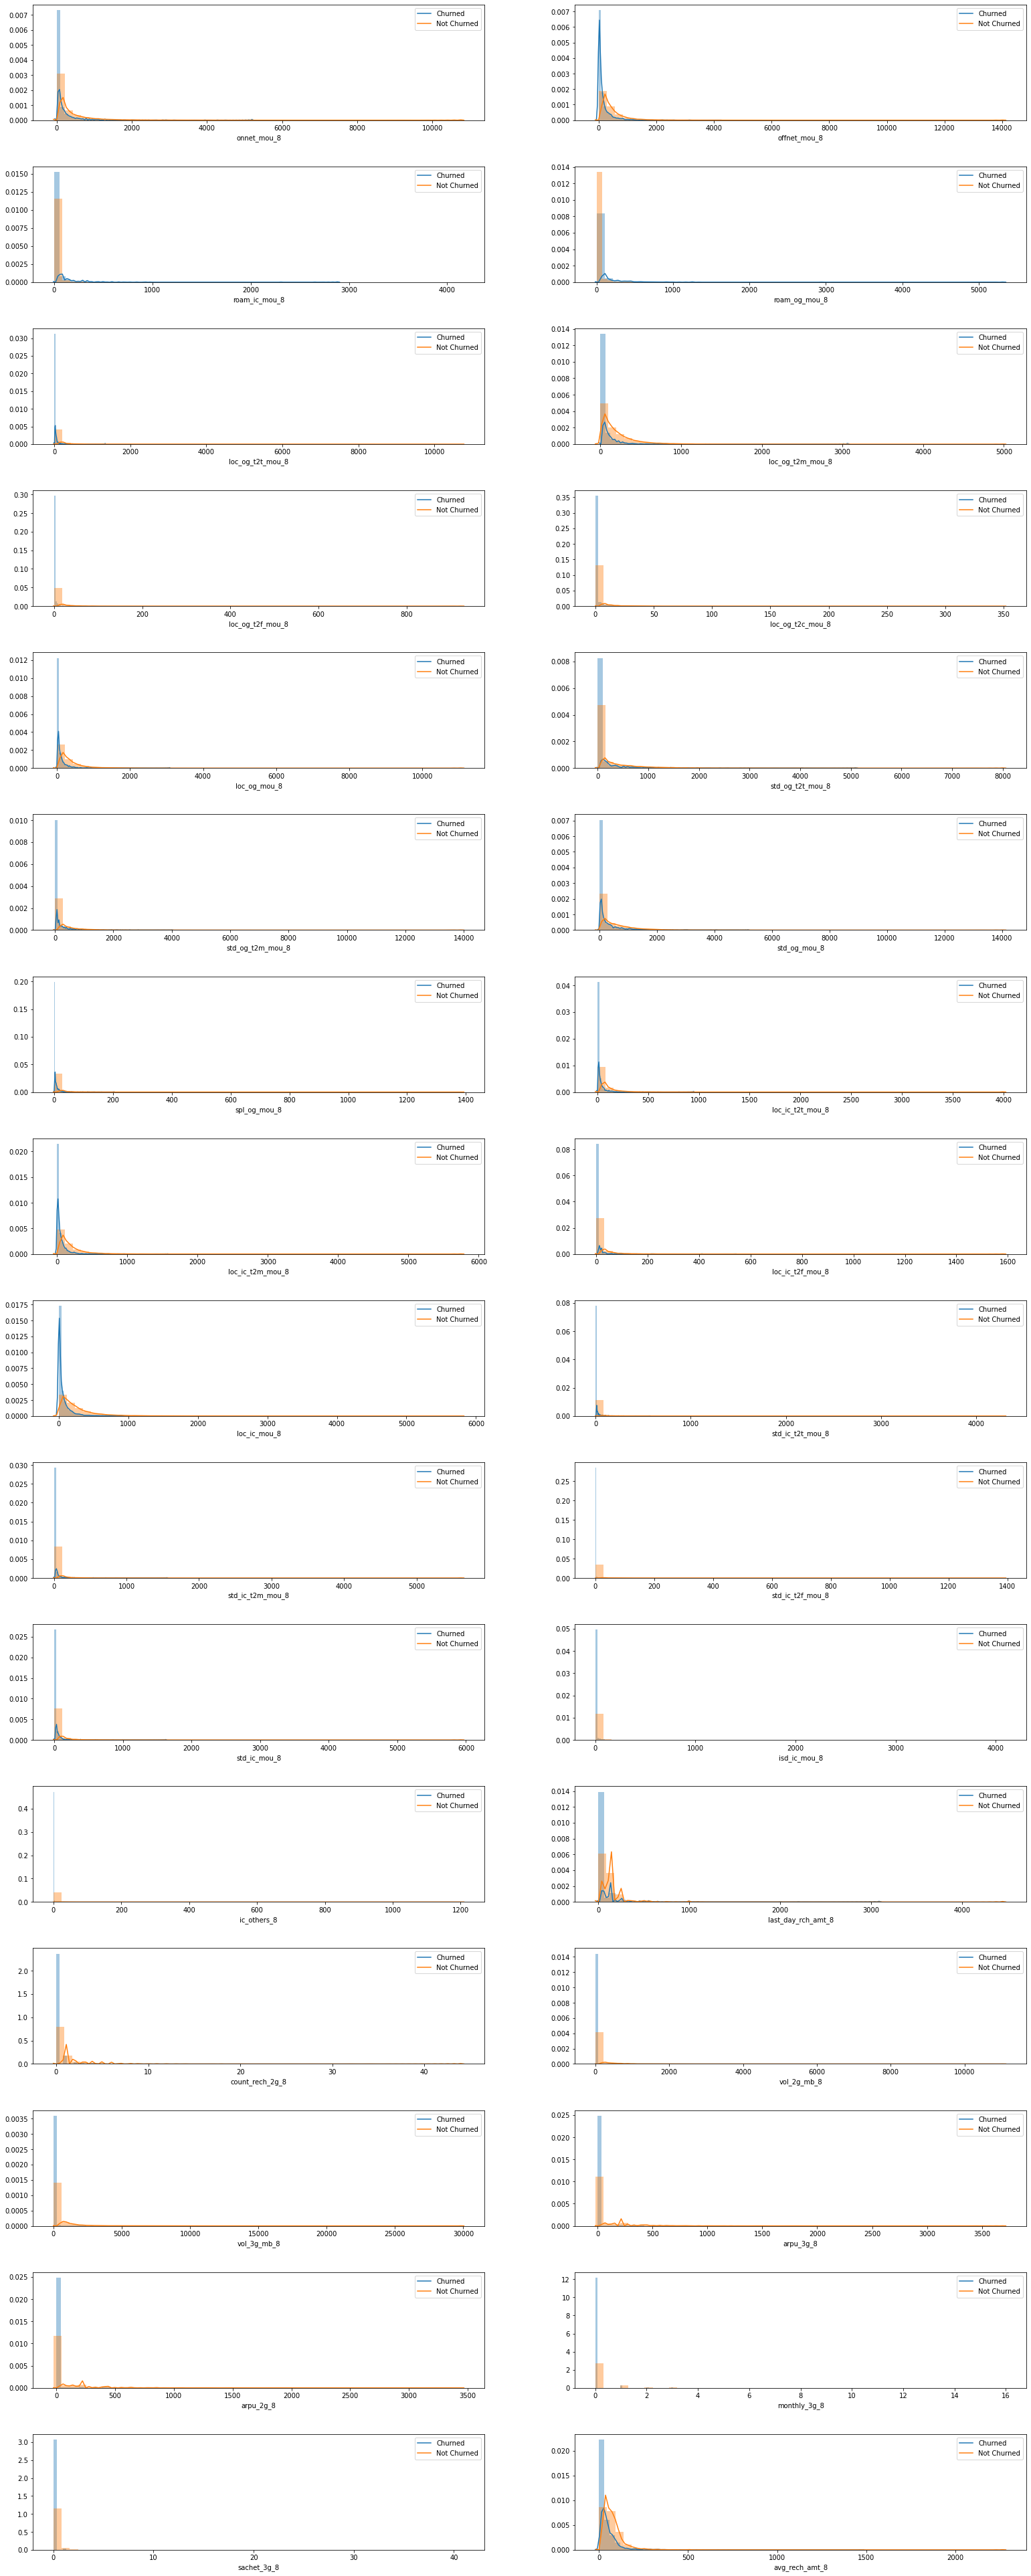

In [ ]:
plt.figure(figsize=(15,70))
plt.subplots_adjust(hspace = 0.4, right=1.5)
for i in enumerate(month_8_cols):
    plt.subplot(16,2, i[0]+1)
    sb.distplot(hvc_knn[hvc_knn['churn']==1][i[1]],hist = True, kde_kws={"label": "Churned"})
    sb.distplot(hvc_knn[hvc_knn['churn']==0][i[1]],hist = True, kde_kws={"label": "Not Churned"})
plt.show()

<strong><font color=green>
- Graphs shifted to left indicates presence of outliers
- Users with less average revenue in 8th month are more likely to churn
- For churned customers calls(incoming/outgoing, local/std) and data usage has also decreased in 8th month
- Number of recharges and recharge amount has also decreased

- **Checking Correlation**

In [ ]:
def Find_Correlation(data):
    # create correlation matrix
    corr = data.corr()
    # replace one's and repetative values with NaN
    corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
    corr_df = corr.unstack().reset_index()
    corr_df.columns = ['VAR1','VAR2','Correlation']
    # dropping NA's
    corr_df.dropna(subset=['Correlation'], inplace=True)
    corr_df.sort_values('Correlation', ascending=False)
    corr_df['Correlation'] = round(corr_df['Correlation'],2)
    corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
    return corr_df.sort_values('Correlation_abs', ascending=False)

In [ ]:
cor = Find_Correlation(hvc_knn)
cor

VAR1                  VAR2  Correlation  \
9347               arpu_2g_8             arpu_3g_8         0.93   
3163        std_og_t2t_mou_8           onnet_mou_8         0.86   
9677            monthly_3g_8             arpu_2g_8         0.86   
9567            monthly_3g_7             arpu_2g_7         0.86   
2943        std_og_t2t_mou_6           onnet_mou_6         0.85   
3053        std_og_t2t_mou_7           onnet_mou_7         0.85   
3383        std_og_t2m_mou_7          offnet_mou_7         0.85   
3493        std_og_t2m_mou_8          offnet_mou_8         0.85   
5384            loc_ic_mou_6      loc_ic_t2m_mou_6         0.85   
5604            loc_ic_mou_8      loc_ic_t2m_mou_8         0.85   
6924            std_ic_mou_8      std_ic_t2m_mou_8         0.85   
9457            monthly_3g_6             arpu_2g_6         0.85   
5609            loc_ic_mou_8          loc_ic_mou_7         0.84   
9674            monthly_3g_8             arpu_3g_8         0.84   
11436    total_rech_amt_diff             arpu_diff         0.84   
2859            loc_og_mou_8          loc_og_mou_7         0.83   
5494            loc_ic_mou_7      loc_ic_t2m_mou_7         0.83   
3273        std_og_t2m_mou_6          offnet_mou_6         0.83   
1539        loc_og_t2t_mou_8      loc_og_t2t_mou_7         0.83   
1869        loc_og_t2m_mou_8      loc_og_t2m_mou_7         0.81   
4949        loc_ic_t2m_mou_8      loc_ic_t2m_mou_7         0.81   
6704            std_ic_mou_6      std_ic_t2m_mou_6         0.81   
6814            std_ic_mou_7      std_ic_t2m_mou_7         0.81   
5499            loc_ic_mou_7          loc_ic_mou_6         0.81   
2089        loc_og_t2f_mou_7      loc_og_t2f_mou_6         0.81   
9236               arpu_2g_7           vol_3g_mb_7         0.81   
4619        loc_ic_t2t_mou_8      loc_ic_t2t_mou_7         0.80   
3189        std_og_t2t_mou_8      std_og_t2t_mou_7         0.80   
9346               arpu_2g_8           vol_3g_mb_8         0.80   
4509        loc_ic_t2t_mou_7      loc_ic_t2t_mou_6         0.79   
4839        loc_ic_t2m_mou_7      loc_ic_t2m_mou_6         0.79   
1429        loc_og_t2t_mou_7      loc_og_t2t_mou_6         0.79   
219              onnet_mou_8           onnet_mou_7         0.79   
2749            loc_og_mou_7          loc_og_mou_6         0.79   
5279        loc_ic_t2f_mou_8      loc_ic_t2f_mou_7         0.79   
9019               arpu_3g_8           vol_3g_mb_8         0.79   
2631            loc_og_mou_6      loc_og_t2m_mou_6         0.79   
2199        loc_og_t2f_mou_8      loc_og_t2f_mou_7         0.78   
3849            std_og_mou_8          std_og_mou_7         0.78   
2851            loc_og_mou_8      loc_og_t2m_mou_8         0.77   
2848            loc_og_mou_8      loc_og_t2t_mou_8         0.77   
10864         avg_rech_amt_8    last_day_rch_amt_8         0.77   
1759        loc_og_t2m_mou_7      loc_og_t2m_mou_6         0.77   
2741            loc_og_mou_7      loc_og_t2m_mou_7         0.76   
3519        std_og_t2m_mou_8      std_og_t2m_mou_7         0.76   
2738            loc_og_mou_7      loc_og_t2t_mou_7         0.76   
549             offnet_mou_8          offnet_mou_7         0.75   
5169        loc_ic_t2f_mou_7      loc_ic_t2f_mou_6         0.75   
3847            std_og_mou_8      std_og_t2m_mou_8         0.75   
2628            loc_og_mou_6      loc_og_t2t_mou_6         0.75   
3627            std_og_mou_6      std_og_t2m_mou_6         0.74   
8909             vol_3g_mb_8           vol_3g_mb_7         0.74   
7259            isd_ic_mou_7          isd_ic_mou_6         0.74   
3737            std_og_mou_7      std_og_t2m_mou_7         0.74   
5829        std_ic_t2t_mou_7      std_ic_t2t_mou_6         0.74   
3844            std_og_mou_8      std_og_t2t_mou_8         0.74   
6929            std_ic_mou_8          std_ic_mou_7         0.74   
6819            std_ic_mou_7          std_ic_mou_6         0.74   
7369            isd_ic_mou_8          isd_ic_mou_7         0.74   
3079

- **Dropping highly correlated variables**

In [ ]:
highly_corr_vars = ['arpu_2g_8','std_og_t2t_mou_8','arpu_2g_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
                   'std_og_t2m_mou_7','std_og_t2m_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_8','arpu_2g_6']

In [ ]:
hvc_knn.drop(columns=highly_corr_vars,inplace=True)

In [ ]:
hvc_knn.shape

(30011, 99)

- **Outliers detection**

Lets generate a Healthcheck to generate a better view

In [ ]:
def num_healthcheck(data):
    perc = [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.01, 0.02, 0.03, 0.04, 0.05,
            0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94,
            0.95, 0.96,
            0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1]
    data_Stats = data.describe(percentiles=perc).T
    data_Stats['Name of variable'] = data_Stats.index
    data_Stats['Q1'] = data_Stats['25%']
    data_Stats['Q3'] = data_Stats['75%']
    data_Stats['IQR'] = data_Stats['Q3'] - data_Stats['Q1']
    data_Stats['upper_bound'] = data_Stats['Q3'] + 1.5 * data_Stats['IQR']
    data_Stats['lower_bound'] = data_Stats['Q1'] - 1.5 * data_Stats['IQR']
    data_Stats['No of points crossing upper_bound'] = (data > data_Stats['upper_bound']).sum()
    data_Stats['No of points crossing lower_bound'] = (data < data_Stats['lower_bound']).sum()
    Healthcheck = pd.DataFrame(data_Stats)
    return Healthcheck

In [ ]:
Healthcheck = num_healthcheck(hvc_knn)
Healthcheck

count         mean         std        min         0%  \
onnet_mou_6            30011.0   296.533165  460.598620     0.0000     0.0000   
onnet_mou_7            30011.0   304.653596  481.613077     0.0000     0.0000   
onnet_mou_8            30011.0   268.438319  466.187505     0.0000     0.0000   
offnet_mou_6           30011.0   418.888338  469.945436     0.0000     0.0000   
offnet_mou_7           30011.0   424.605583  486.037214     0.0000     0.0000   
offnet_mou_8           30011.0   376.600747  476.456330     0.0000     0.0000   
roam_ic_mou_6          30011.0    17.677515   79.861823     0.0000     0.0000   
roam_ic_mou_7          30011.0    13.680677   76.489316     0.0000     0.0000   
roam_ic_mou_8          30011.0    13.573594   74.706751     0.0000     0.0000   
roam_og_mou_6          30011.0    29.648677  118.932432     0.0000     0.0000   
roam_og_mou_7          30011.0    22.226871   98.018043     0.0000     0.0000   
roam_og_mou_8          30011.0    21.871170  106.342206     0.0000     0.0000   
loc_og_t2t_mou_6       30011.0    94.803568  236.808491     0.0000     0.0000   
loc_og_t2t_mou_7       30011.0    95.859424  248.096252     0.0000     0.0000   
loc_og_t2t_mou_8       30011.0    87.465248  234.693920     0.0000     0.0000   
loc_og_t2m_mou_6       30011.0   181.660883  249.928544     0.0000     0.0000   
loc_og_t2m_mou_7       30011.0   181.605304  240.538659     0.0000     0.0000   
loc_og_t2m_mou_8       30011.0   168.324380  234.487159     0.0000     0.0000   
loc_og_t2f_mou_6       30011.0     7.007531   22.666208     0.0000     0.0000   
loc_og_t2f_mou_7       30011.0     7.114047   22.586755     0.0000     0.0000   
loc_og_t2f_mou_8       30011.0     6.538761   20.221327     0.0000     0.0000   
loc_og_t2c_mou_6       30011.0     1.580601    6.901060     0.0000     0.0000   
loc_og_t2c_mou_7       30011.0     1.870605    9.256046     0.0000     0.0000   
loc_og_t2c_mou_8       30011.0     1.734506    7.400482     0.0000     0.0000   
loc_og_mou_6           30011.0   283.480837  379.671865     0.0000     0.0000   
loc_og_mou_7           30011.0   284.587789  375.550285     0.0000     0.0000   
loc_og_mou_8           30011.0   262.336925  365.978027     0.0000     0.0000   
std_og_t2m_mou_6       30011.0   203.379792  413.401953     0.0000     0.0000   
std_og_mou_6           30011.0   395.396829  606.324808     0.0000     0.0000   
std_og_mou_7           30011.0   415.610232  637.298503     0.0000     0.0000   
std_og_mou_8           30011.0   354.405313  615.810760     0.0000     0.0000   
spl_og_mou_6           30011.0     5.950615   18.624955     0.0000     0.0000   
spl_og_mou_7           30011.0     7.455633   23.065063     0.0000     0.0000   
spl_og_mou_8           30011.0     6.960646   22.888604     0.0000     0.0000   
og_others_6            30011.0     0.695265    2.284351     0.0000     0.0000   
loc_ic_t2t_mou_6       30011.0    68.898122  158.601211     0.0000     0.0000   
loc_ic_t2t_mou_7       30011.0    70.510489  167.538391     0.0000     0.0000   
loc_ic_t2t_mou_8       30011.0    66.351517  155.644998     0.0000     0.0000   
loc_ic_t2m_mou_7       30011.0   161.205052  219.231100     0.0000     0.0000   
loc_ic_t2f_mou_6       30011.0    15.634684   45.820413     0.0000     0.0000   
loc_ic_t2f_mou_7       30011.0    16.551479   49.472628     0.0000     0.0000   
loc_ic_t2f_mou_8       30011.0    14.806569   43.703859     0.0000     0.0000   
loc_ic_mou_6           30011.0   244.562317  312.447879     0.0000     0.0000   
loc_ic_mou_7           30011.0   248.277070  315.313050     0.0000     0.0000   
loc_ic_mou_8           30011.0   235.939973  306.219008     0.0000     0.0000   
std_ic_t2t_mou_6       30011.0    16.270563   78.861125     0.0000     0.0000   
std_ic_t2t_mou_7       30011.0    16.922958   84.689106     0.0000     0.0000   
std_ic_t2t_mou_8       30011.0    15.139028   72.457325     0.0000     0.0000   
std_ic_t2m_mou_6       30011.0    32.102186  101.076959 

<strong><font color=green>
- We can see that we have outliers in almost all variables
- We will do power transformation to handle the outliers after splitting the data in train and test

# 7. Data Preparation

- **Dummy encoding of categorical variables**

In [ ]:
# Checking unique values in each variable

hvc_knn.nunique()

onnet_mou_6              19124
onnet_mou_7              19230
onnet_mou_8              18484
offnet_mou_6             22770
offnet_mou_7             22952
offnet_mou_8             22440
roam_ic_mou_6             4528
roam_ic_mou_7             3804
roam_ic_mou_8             4265
roam_og_mou_6             5365
roam_og_mou_7             4582
roam_og_mou_8             4985
loc_og_t2t_mou_6         11436
loc_og_t2t_mou_7         11421
loc_og_t2t_mou_8         11481
loc_og_t2m_mou_6         17053
loc_og_t2m_mou_7         17150
loc_og_t2m_mou_8         16954
loc_og_t2f_mou_6          3434
loc_og_t2f_mou_7          3436
loc_og_t2f_mou_8          3477
loc_og_t2c_mou_6          1814
loc_og_t2c_mou_7          1875
loc_og_t2c_mou_8          2079
loc_og_mou_6             20000
loc_og_mou_7             20163
loc_og_mou_8             19696
std_og_t2m_mou_6         14778
std_og_mou_6             18600
std_og_mou_7             18666
std_og_mou_8             17587
spl_og_mou_6              3285
spl_og_m

In [ ]:
# Performing pd.get_dummies

to_dummy = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
hvc_knn = pd.get_dummies(data=hvc_knn, columns=to_dummy, drop_first=True)
hvc_knn.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        57.84        54.68        52.29        453.43        567.16   
1       413.69       351.03        35.08         94.66         80.63   
2       501.76       108.39       534.24        413.31        119.28   
3        50.51        74.01        70.61        296.29        229.74   
4      1185.91         9.28         7.79         61.64          0.00   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0        325.91          16.23          33.49          31.64          23.74   
1        136.48           0.00           0.00           0.00           0.00   
2        482.46          23.53         144.24          72.11           7.98   
3        162.76           0.00           2.83           0.00           0.00   
4          5.54           0.00           4.76           4.81           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0          12.59          38.06             51.39             31.38   
1           0.00           0.00            297.13            217.59   
2          35.26           1.44             49.63              6.19   
3          17.74           0.00             42.61             65.16   
4           8.46          13.34             38.99              0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             40.28            308.63            447.38            162.28   
1             12.49             80.96             70.58             50.54   
2             36.01            151.13             47.28            294.46   
3             67.38            273.29            145.99            128.28   
4              0.00             58.54              0.00              0.00   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0             62.13             55.14             53.23               0.0   
1              0.00              0.00              0.00               0.0   
2              4.54              0.00             23.51               0.0   
3              0.00              4.48             10.26               0.0   
4              0.00              0.00              0.00               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0              0.00        422.16        533.91   
1               0.0              7.15        378.09        288.18   
2               0.0              0.49        205.31         53.48   
3               0.0              0.00        315.91        215.64   
4               0.0              0.00         97.54          0.00   

   loc_og_mou_8  std_og_t2m_mou_6  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0        255.79             49.89         60.86         75.14         77.84   
1         63.04             13.69        130.26        143.48         98.28   
2        353.99            255.36        701.78        138.93        655.18   
3        205.93             22.99         30.89         67.09         21.53   
4          0.00              1.55       1148.46          0.81          0.00   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_t2t_mou_6  \
0          4.50          0.00          6.50         0.00             58.14   
1          0.00          0.00         10.23         0.00             23.84   
2          0.00          0.00          4.78         0.00             67.88   
3          0.00          3.26          5.91         0.00             41.33   
4          2.58          0.00          0.00         0.93             34.54   

   loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  \
0             32.26             27.31            221.49            152.16   
1              9.84              0.31             13.98              0.00   
2              7.58             52.58             18.53              4.81   
3             71.44             28.89            149.69              8.71  

In [ ]:
# # Checking shape of dataframe after dropping unnecessary variables

hvc_knn.shape

(30011, 207)

- **Train and Test split**

In [ ]:
# Bifurcating features and target variable

X = hvc_knn.drop('churn', axis=1)
y = hvc_knn['churn']

In [ ]:
# Performing train, test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify = y, shuffle=True, random_state=42)

In [ ]:
# Checking shape of resultant data sets after train, test split

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21007, 206), (9004, 206), (21007,), (9004,))

In [ ]:
y_train.value_counts(normalize=True)

0.0    0.9136
1.0    0.0864
Name: churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0.0    0.913594
1.0    0.086406
Name: churn, dtype: float64

- **Power Transform for removing outliers**

In [ ]:
X_train_pt = X_train.copy()
X_test_pt = X_test.copy()

In [ ]:
pt = PowerTransformer()

In [ ]:
cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
        'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
        'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
        'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_mou_6',
        'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
        'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
        'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
        'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
        'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
        'spl_ic_mou_6', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_2g_7',
        'count_rech_2g_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6', 'avg_rech_amt_7', 'avg_rech_amt_8',
        'arpu_diff', 'total_og_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
        'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'av_rech_amt_data_diff']

In [ ]:
X_train_pt[cols] = pt.fit_transform(X_train_pt[cols])

In [ ]:
X_test_pt[cols] = pt.transform(X_test_pt[cols])

- **Feature Selection using `Standard Scaler`**

In [ ]:
# Taking copy of the 'X_train' and 'X_test' to avoid 'SettingWithCopyWarning'

X_train_scaled = X_train_pt.copy()
X_test_scaled = X_test_pt.copy()

In [ ]:
# Checking head of 'X_train_scaled' after modification

X_train_scaled.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
21732     0.766389     0.568050     0.700361      3.277160      3.123532   
19336     1.278743     1.544670     1.446317     -0.534389      1.772374   
3166      2.626856     1.509486     1.356046     -0.750541     -1.318364   
2408     -0.066080    -0.283168    -0.170389     -0.099858     -0.600339   
16282    -1.043262    -1.330779    -1.052543     -0.318597     -0.021194   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
21732      1.232365      -0.553980      -0.489117      -0.518845   
19336      1.564250      -0.553980      -0.489117      -0.518845   
3166      -0.561303      -0.553980      -0.489117      -0.518845   
2408      -0.606567      -0.553980      -0.489117      -0.518845   
16282     -0.032370       1.683482      -0.489117      -0.518845   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
21732      -0.560534      -0.493751       1.809038          0.474193   
19336      -0.560534      -0.493751      -0.520636         -0.635501   
3166       -0.560534      -0.493751      -0.520636         -1.418969   
2408       -0.560534      -0.493751      -0.520636          0.509666   
16282       1.745751      -0.493751      -0.520636         -0.377636   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
21732          0.535763          0.807173          0.034889          0.460611   
19336          0.154098          0.180167         -0.645255          0.363058   
3166          -1.330031         -1.175256         -0.787751         -0.639739   
2408           0.085400          0.059998          0.277256         -0.084723   
16282         -0.610019         -0.384975          0.117413          0.504131   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
21732         -0.750752          1.449058          1.265110          1.416350   
19336         -0.053619         -0.923839         -0.933823         -0.902824   
3166          -1.134234         -0.127762         -0.184204         -0.902824   
2408          -0.259889          1.710883          1.520981          1.551746   
16282          0.618599          1.685808          1.686744          1.449369   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
21732          2.066333         -0.565467          1.180252      0.107089   
19336          2.063295         -0.565467         -0.566021     -0.800277   
3166          -0.543816         -0.565467         -0.566021     -1.015415   
2408          -0.543816         -0.565467         -0.566021      0.395605   
16282          1.973936          2.014240         -0.566021      0.076501   

       loc_og_mou_7  loc_og_mou_8  std_og_t2m_mou_6  std_og_mou_6  \
21732      0.379414      0.002477          2.127381      1.996897   
19336      0.156511     -0.127240          0.552195      1.080212   
3166      -0.887068     -1.244710          0.457677      1.903108   
2408      -0.083392     -0.171246          0.267021      0.071394   
16282      0.330487      0.354735         -0.873091     -0.560767   

       std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
21732      1.885365      1.246116      1.397145      0.816127      1.310560   
19336      1.613320      1.542847      1.253052      0.654947      1.604879   
3166       1.157220      1.163879     -0.920172     -0.982526      0.556517   
2408      -0.084994      0.081690      0.073799      0.061987     -0.784082   
16282     -1.477250     -0.850671      0.700824      1.248512     -0.966775   

       og_others_6  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
21732     2.019559          0.690327          0.585275          0.750531   
19336    -0.543196          1.308649          0.792819          0.409304   
3166     -0.543196         -0.908256         -0.681227         -1.174253   
2408      1.310845          1.214742          1.031753          0.313091   
1

In [ ]:
# Fitting Standard scaler and transforming the train set

scaler = StandardScaler()

X_train_scaled[cols] = scaler.fit_transform(X_train_scaled[cols])

In [ ]:
#  transforming test data set

X_test_scaled[cols] = scaler.transform(X_test_scaled[cols])

In [ ]:
# Checking head after scaling the train data

X_train_scaled.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
21732     0.766389     0.568050     0.700361      3.277160      3.123532   
19336     1.278743     1.544670     1.446317     -0.534389      1.772374   
3166      2.626856     1.509486     1.356046     -0.750541     -1.318364   
2408     -0.066080    -0.283168    -0.170389     -0.099858     -0.600339   
16282    -1.043262    -1.330779    -1.052543     -0.318597     -0.021194   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
21732      1.232365      -0.553980      -0.489117      -0.518845   
19336      1.564250      -0.553980      -0.489117      -0.518845   
3166      -0.561303      -0.553980      -0.489117      -0.518845   
2408      -0.606567      -0.553980      -0.489117      -0.518845   
16282     -0.032370       1.683482      -0.489117      -0.518845   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
21732      -0.560534      -0.493751       1.809038          0.474193   
19336      -0.560534      -0.493751      -0.520636         -0.635501   
3166       -0.560534      -0.493751      -0.520636         -1.418969   
2408       -0.560534      -0.493751      -0.520636          0.509666   
16282       1.745751      -0.493751      -0.520636         -0.377636   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
21732          0.535763          0.807173          0.034889          0.460611   
19336          0.154098          0.180167         -0.645255          0.363058   
3166          -1.330031         -1.175256         -0.787751         -0.639739   
2408           0.085400          0.059998          0.277256         -0.084723   
16282         -0.610019         -0.384975          0.117413          0.504131   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
21732         -0.750752          1.449058          1.265110          1.416350   
19336         -0.053619         -0.923839         -0.933823         -0.902824   
3166          -1.134234         -0.127762         -0.184204         -0.902824   
2408          -0.259889          1.710883          1.520981          1.551746   
16282          0.618599          1.685808          1.686744          1.449369   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
21732          2.066333         -0.565467          1.180252      0.107089   
19336          2.063295         -0.565467         -0.566021     -0.800277   
3166          -0.543816         -0.565467         -0.566021     -1.015415   
2408          -0.543816         -0.565467         -0.566021      0.395605   
16282          1.973936          2.014240         -0.566021      0.076501   

       loc_og_mou_7  loc_og_mou_8  std_og_t2m_mou_6  std_og_mou_6  \
21732      0.379414      0.002477          2.127381      1.996897   
19336      0.156511     -0.127240          0.552195      1.080212   
3166      -0.887068     -1.244710          0.457677      1.903108   
2408      -0.083392     -0.171246          0.267021      0.071394   
16282      0.330487      0.354735         -0.873091     -0.560767   

       std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
21732      1.885365      1.246116      1.397145      0.816127      1.310560   
19336      1.613320      1.542847      1.253052      0.654947      1.604879   
3166       1.157220      1.163879     -0.920172     -0.982526      0.556517   
2408      -0.084994      0.081690      0.073799      0.061987     -0.784082   
16282     -1.477250     -0.850671      0.700824      1.248512     -0.966775   

       og_others_6  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
21732     2.019559          0.690327          0.585275          0.750531   
19336    -0.543196          1.308649          0.792819          0.409304   
3166     -0.543196         -0.908256         -0.681227         -1.174253   
2408      1.310845          1.214742          1.031753          0.313091   
1

In [ ]:
X_train_scaled.shape

(21007, 206)

In [ ]:
y_train.value_counts()

0.0    19192
1.0     1815
Name: churn, dtype: int64

In [ ]:
# Calculating number to be given as 'scale_pos_weight' parameter in XGBoost

(19192/1815)

10.574104683195593

<strong><font color=green>
- In XGBoost 'scale_pos_weight' is the class weight parameter
- We have to give a number for class weight and it is calculated as (number of positives)/(number of negatives)
- We will use 10.57 number as 'scale_pos_weight' in XGBoost model

- **Using `RFE` for feature selection**

In [ ]:
%%time
# # Using 'XGBClassifier' and 'RFE' for feature selection - Selecting 40 features

listed = [50,45,40,35,30,25,20,15,10]

def recall_list_xgb(X, y, listed):
    recall = []
    for i in listed:
        model = XGBClassifier(scale_pos_weight=10.57)
        rfe = RFE(model,n_features_to_select=i)
        rfe = rfe.fit(X,y)
        col = X.columns[rfe.support_]
        X = X[col]
        xgb = XGBClassifier(scale_pos_weight=10.57)
        xgb_model = xgb.fit(X, y)
        recall.append(recall_score(y, xgb_model.predict(X[col])))
    return recall
rec_output_xgb = recall_list_xgb(X_train_scaled,y_train,listed)
print(rec_output_xgb)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9988980716253444, 0.9983471074380166, 0.9933884297520661]
CPU times: user 2h 14min 23s, sys: 2min 48s, total: 2h 17min 12s
Wall time: 24min 23s


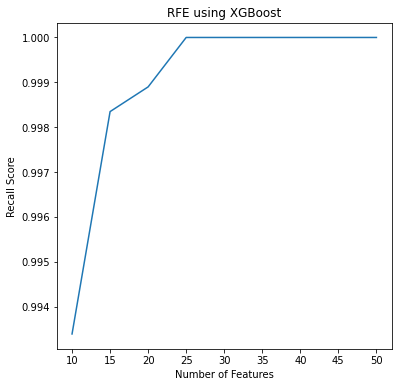

In [ ]:
plt.figure(figsize=(6,6))
sb.lineplot(x=listed, y=rec_output_xgb)
plt.xlabel('Number of Features')
plt.ylabel('Recall Score')
plt.title('RFE using XGBoost')
plt.show();

<strong><font color=green>


<strong><font color =green>
- Number of features anything above 15, is having good recall
- However we will be using 20 features as it is giving similar results when compared to higher number of features

# 8. Building Models

## PART 1 - Interpretable Model

### Building Model using XGBoost as an interpretable model

In [ ]:
# Using 'XGBClassifier' and 'RFE' for feature selection - Selecting 20 features

xgboost = XGBClassifier(scale_pos_weight=10.57)
rfe = RFE(xgboost,n_features_to_select=20)
rfe = rfe.fit(X_train_scaled,y_train)

In [ ]:
# Keeping only those columns which were selected using RFE

feat_col = X_train_scaled.columns[rfe.support_]
X_train_scaled = X_train_scaled[feat_col]
X_test_scaled = X_test_scaled[feat_col]
X_train_scaled.head()

In [ ]:
xgb_col_20 = feat_col

In [ ]:
X_train_scaled = X_train_scaled[xgb_col_20]

In [ ]:
xgb = XGBClassifier(scale_pos_weight=10.57)
xgb_model = xgb.fit(X_train_scaled, y_train)

In [ ]:
accuracy_score(y_train, xgb_model.predict(X_train_scaled))

0.9703908221069167

In [ ]:
recall_score(y_train, xgb_model.predict(X_train_scaled))

0.9988980716253444

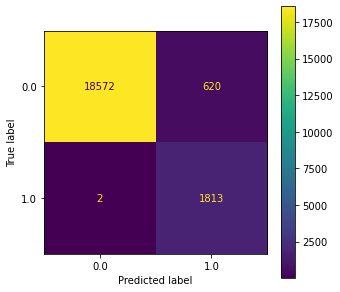

In [ ]:
# Plotting confusion matrix
rcParams['figure.figsize'] = 5,5
plot_confusion_matrix(estimator=xgb_model, X=X_train_scaled, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- True Negatives(TN) - Actually they did Not Churn and model predicted they will Not Churn
- True Positives(TP) - Actually they Churned and model predicted they will Churn
- False Positives(FP) - Actually they did Not Churn but model predicted they will Churn
- False Negatives(FN) - Actually they Churned but model predicted they will Not Churn
- True Negatives = 18572, True Positives = 1813, False Positives = 620, False Negatives = 2

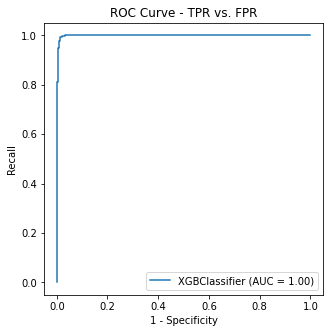

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 5,5
plot_roc_curve(estimator=xgb_model, X=X_train_scaled, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for XGBoost classifier is 1.00, this is clear case of overfitting
- We will be performing GridSearchCV for hyper-parameter tuning

- **Analysing Important Features**

In [ ]:
# Creating features importance data frame for cv_opt_est model

cv_imp_feat = pd.DataFrame(xgb_model.feature_importances_,X_train_scaled.columns).reset_index().sort_values(by=0, ascending=False)
cv_imp_feat.columns = ['Features', 'Importance']
cv_imp_feat

Features  Importance
15              arpu_diff    0.129610
8      last_day_rch_amt_8    0.111627
2           roam_og_mou_8    0.107215
17    total_rech_amt_diff    0.091583
0           roam_ic_mou_8    0.064869
10            vol_3g_mb_8    0.053745
5            loc_og_mou_8    0.050314
9             vol_2g_mb_8    0.041055
6            loc_ic_mou_8    0.036580
18     max_rech_data_diff    0.031330
16      total_ic_mou_diff    0.031297
3        loc_og_t2m_mou_8    0.031249
19  av_rech_amt_data_diff    0.030903
14         avg_rech_amt_8    0.029623
4        loc_og_t2f_mou_8    0.028352
12             aug_vbc_3g    0.027703
1           roam_og_mou_7    0.027312
7        std_ic_t2f_mou_8    0.025409
11                    aon    0.025114
13         avg_rech_amt_6    0.025112

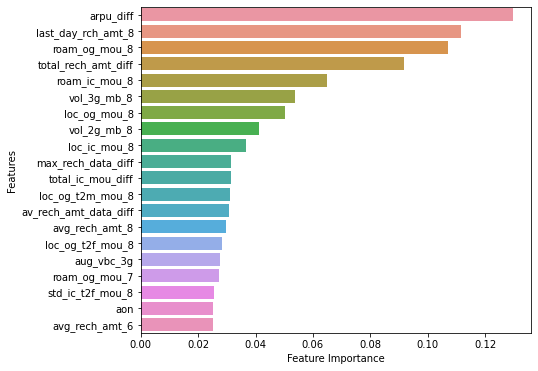

In [ ]:
# Plotting feature importance for cv_opt_est model

plt.figure(figsize=(7,6))
sb.barplot(cv_imp_feat.Importance, cv_imp_feat.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

<strong><font color=green>
- We will be concentrating more on Recall because avoiding type 2 error (actually customers churned but our model predicted them as they will not churn) is critical for us, if in the process we predict not churn to be churn that is okay
- This model has `accuracy = 0.97`, `Recall = 0.99`
- Top 5 features according to xgb_model are `arpu_diff = 0.129`, `last_day_rch_amt_8 = 0.111`, `roam_og_mou_8 = 0.107`, `total_rech_amt_diff = 0.091`, `roam_ic_mou_8 = 0.064`

### Grid Search for finding optimum Hyperparameters for 'Recall'

In [ ]:
%%time
# Performing Grid Search on the train data set using XGBoost as the estimator

gs_xgb_model = XGBClassifier(scale_pos_weight=10.57)

param = {'learning_rate': [0.001,0.01,0.1,0.2,0.3,0.9],
        'max_depth':[5,10,15,20,25],
        'min_child_weight':[20,25,30,35],
        'n_estimators':[50,100,200,300,500]}


gs_xgb = GridSearchCV(estimator=gs_xgb_model,
                      param_grid=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1)

gs_xgb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 86.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 86.6min finished


CPU times: user 23.5 s, sys: 1.24 s, total: 24.7 s
Wall time: 1h 26min 39s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=10.57, subsample=None,
                                     tree_method=None, v

In [ ]:
# Converting results for grid search which is a dictionary into a data frame

gs_cv_results = pd.DataFrame(gs_xgb.cv_results_)
gs_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.615366      0.019421         0.048733        0.007537   
1       6.668736      0.049028         0.043000        0.002995   
2      12.600667      0.297080         0.079843        0.004539   
3      18.223840      0.050069         0.168900        0.035313   
4      32.202170      0.513361         0.280401        0.003581   

  param_learning_rate param_max_depth param_min_child_weight  \
0               0.001               5                     20   
1               0.001               5                     20   
2               0.001               5                     20   
3               0.001               5                     20   
4               0.001               5                     20   

  param_n_estimators                                             params  \
0                 50  {'learning_rate': 0.001, 'max_depth': 5, 'min_...   
1                100  {'learning_rate': 0.001, 'max_depth': 5, 'min_...   
2                200  {'learning_rate': 0.001, 'max_depth': 5, 'min_...   
3                300  {'learning_rate': 0.001, 'max_depth': 5, 'min_...   
4                500  {'learning_rate': 0.001, 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.813223           0.831405           0.831405         0.825344   
1           0.813223           0.823140           0.836364         0.824242   
2           0.811570           0.816529           0.823140         0.817080   
3           0.813223           0.816529           0.826446         0.818733   
4           0.811570           0.821488           0.836364         0.823140   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.008571               17            0.876033            0.875207   
1        0.009479               22            0.875207            0.871074   
2        0.004740               38            0.876860            0.865289   
3        0.005619               35            0.880165            0.870248   
4        0.010189               25            0.881818            0.879339   

   split2_train_score  mean_train_score  std_train_score  
0            0.860331          0.870523         0.007215  
1            0.858678          0.868320         0.007023  
2            0.845455          0.862534         0.012968  
3            0.852893          0.867769         0.011271  
4            0.865289          0.875482         0.007278

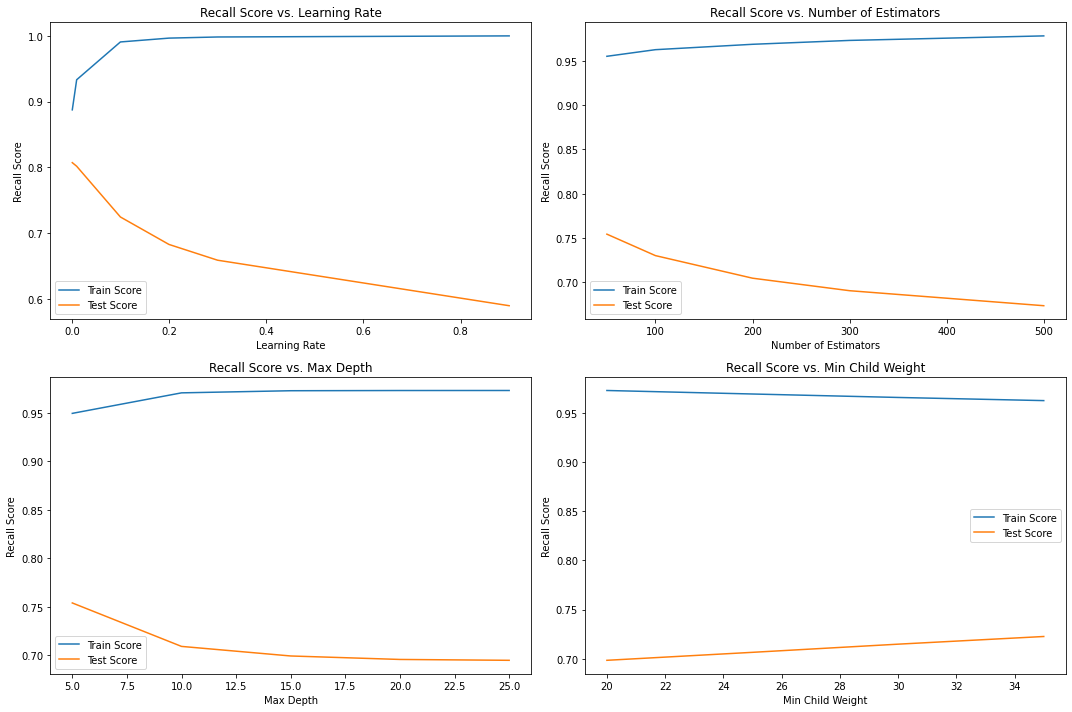

In [ ]:
# Plotting mean_test_score against the hyper-parameters

plt.figure(figsize=(15,10))

plt.subplot(221)
sb.lineplot(x=gs_cv_results['param_learning_rate'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_learning_rate'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Learning Rate')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Learning Rate')

plt.subplot(222)
sb.lineplot(x=gs_cv_results['param_n_estimators'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_n_estimators'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Number of Estimators')

plt.subplot(223)
sb.lineplot(x=gs_cv_results['param_max_depth'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_max_depth'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Max Depth')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Max Depth')

plt.subplot(224)
sb.lineplot(x=gs_cv_results['param_min_child_weight'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_min_child_weight'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Min Child Weight')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Min Child Weight')


plt.legend()
plt.tight_layout()
plt.show();

<strong><font color=green>
- **`Recall vs. Learning Rate plot`**
- We can see that as learning rate increases the train recall score increases, however, lower learning rate gives high test recall score and as learning rate increases the test recall score decreases. So using lower learning rate is advisable
- **`Recall vs. Number of Estimators Plot`**
- We can see that as number of estimators increases the train recall score increases, however, less number of estimators gives high test recall score and as number of estimators increases the test recall score decreases. So using less number of estimators is advisable
- **`Recall vs. Max Depth Plot`**
- We can see that as max depth increases the train recall score increases to a point and then becomes flat, however, low max depth gives high test recall score and as max depth increases the test recall score decreases and then tending to become flat. So using lower max depth is advisable
- **`Recall vs. Min Child Weight Plot`**
- We can see that as min child weight increases the train recall score decreases gradually, however, low min child weight gives low test recall score and as min child weight increases the test recall score also increases. So using higher min child weight may be advisable
- `Note:` Used less number of parameters due to very slow processing speed

In [ ]:
# Checking the best parameters chosen by grid search model

gs_xgb.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 35,
 'n_estimators': 100}

In [ ]:
# Building the model again with best parameters from grid search

gs_xgb_model = XGBClassifier(learning_rate=0.01,
                            max_depth=5,
                            min_child_weight=35,
                            n_estimators=100,
                            scale_pos_weight=10.57)

gs_xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=35, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.57, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluation of gs_xgb_model

- **Analysing different metrics**

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, gs_xgb_model.predict(X_train_scaled))

0.8729947160470319

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, gs_xgb_model.predict(X_train_scaled))

0.8820936639118457

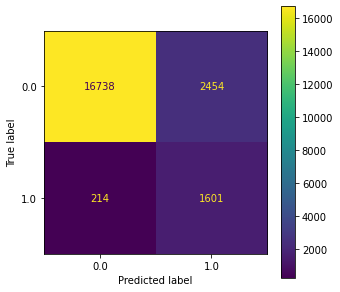

In [ ]:
# Plotting confusion matrix

plot_confusion_matrix(estimator=gs_xgb_model, X=X_train_scaled, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- True Negatives(TN) - Actually they did Not Churn and model predicted they will Not Churn
- True Positives(TP) - Actually they Churned and model predicted they will Churn
- False Positives(FP) - Actually they did Not Churn but model predicted they will Churn
- False Negatives(FN) - Actually they Churned but model predicted they will Not Churn
- True Negatives = 16738, True Positives = 1601, False Positives = 2454, False Negatives = 214

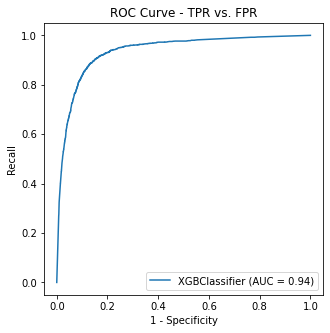

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 5,5
plot_roc_curve(estimator=gs_xgb_model, X=X_train_scaled, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for GridSearch XGBoost model is 0.94, this looks good
- We will be examing diferent thresholds to check if we get better recall score

- **Analysing Important Features**

In [ ]:
# Creating features importance data frame for cv_opt_est model

gs_xgb_feat = pd.DataFrame(gs_xgb_model.feature_importances_,X_train_scaled.columns).reset_index()
gs_xgb_feat.columns = ['Features', 'Importance']
gs_xgb_feat = gs_xgb_feat.sort_values(by=['Importance'], ascending=False)
gs_xgb_feat.head()

Features  Importance
15            arpu_diff    0.321958
17  total_rech_amt_diff    0.219648
2         roam_og_mou_8    0.075523
0         roam_ic_mou_8    0.067333
8    last_day_rch_amt_8    0.064018

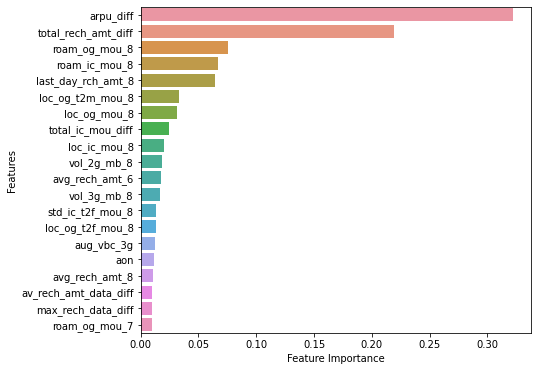

In [ ]:
# Plotting feature importance for cv_opt_est model

plt.figure(figsize=(7,6))
sb.barplot(gs_xgb_feat.Importance, gs_xgb_feat.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

<strong><font color=green>
- We will be concentrating more on Recall because avoiding type 2 error (actually customers churned but our model predicted them as they will not churn) is critical for us, if in the process we predict not churn to be churn that is okay
- This model has `accuracy = 0.87`, `Recall = 0.88`
- Top 5 features according to xgb_model are `arpu_diff = 0.321`, `total_rech_amt_diff = 0.219`, `roam_og_mou_8 = 0.075`,  `roam_ic_mou_8 = 0.067`, `last_day_rech_amt = 0.064`
- Among top 5 features, the default xgboost model had given second highest importance to 'last_day_rech_amt', however, the grid search xgboost model gave it fifth highest importance, which is least among top 5 features

### Predicting probability of classes to apply different thresholds

In [ ]:
# Getting prediction on train set

y_train_pred = gs_xgb_model.predict_proba(X_train_scaled)[:,1]
y_train_pred[:10]

array([0.74356794, 0.22583216, 0.54061574, 0.3756306 , 0.23456134,
       0.7675969 , 0.3289281 , 0.7594249 , 0.36190984, 0.22583216],
      dtype=float32)

- **Creating a dataframe actual churn flag and the predicted probabilities**

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final = y_train_pred_final.reset_index()
y_train_pred_final = y_train_pred_final.drop('index', axis=1)
y_train_pred_final.head()

Churn  Churn_prob
0    1.0    0.743568
1    0.0    0.225832
2    0.0    0.540616
3    0.0    0.375631
4    0.0    0.234561

In [ ]:
nums = [x/10 for x in range(10)]

for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    1.0    0.743568    1    1    1    1    1    1    1    1    0    0
1    0.0    0.225832    1    1    1    0    0    0    0    0    0    0
2    0.0    0.540616    1    1    1    1    1    1    0    0    0    0
3    0.0    0.375631    1    1    1    1    0    0    0    0    0    0
4    0.0    0.234561    1    1    1    0    0    0    0    0    0    0

In [ ]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.086400  1.000000  0.000000
0.2   0.2  0.086495  1.000000  0.000104
0.3   0.3  0.685819  0.963636  0.659546
0.4   0.4  0.816109  0.929477  0.805388
0.5   0.5  0.872995  0.882094  0.872134
0.6   0.6  0.906841  0.796694  0.917257
0.7   0.7  0.930499  0.652893  0.956753
0.8   0.8  0.913600  0.000000  1.000000
0.9   0.9  0.913600  0.000000  1.000000


<strong><font color=green>
- We can see that decreasing threshold increases the recall/sensivity, decreasing threshold too much is advisable as well
- So we will be taking 0.4 as threshold and making the predictions again

### Predicting the Test Data

In [ ]:
X_test_scaled.shape

(9004, 20)

In [ ]:
# Getting prediction on train set

y_test_pred = pd.DataFrame(gs_xgb_model.predict_proba(X_test_scaled)[:,1])
y_test_pred.columns = ['predict_prob']
y_test_pred.head()

predict_prob
0      0.219331
1      0.227112
2      0.225832
3      0.244820
4      0.788320

In [ ]:
y_test_pred['prediction'] = y_test_pred['predict_prob'].map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_test_pred.head()

predict_prob  prediction
0      0.219331           0
1      0.227112           0
2      0.225832           0
3      0.244820           0
4      0.788320           1

### Analysing performance of the models on Test data set

In [ ]:
# Filtering only 20 features which were Selected using RFE

X_test_scaled = X_test_scaled[xgb_col_20]

In [ ]:
res = pd.DataFrame(columns=['Model','Test Accuracy','Test Recall'])

In [ ]:
res = res.append({'Model':'xgb with Grid search',
                 'Test Accuracy':accuracy_score(y_test, y_test_pred.prediction),
                 'Test Recall':recall_score(y_test, y_test_pred.prediction)},ignore_index=True)

In [ ]:
res

Model  Test Accuracy  Test Recall
0  xgb with Grid search       0.804976     0.902314

<strong><font color=green>
- By taking threshold of 0.4 we are getting `accuracy = 0.80`, `Recall = 0.90` on test data set, which is good
- This means the grid search xgboost model is not overfitting and performing well on the test data set

## PART 2 - High Performance Models

### Building models using PCA

- **Standardizing the data sets**

In [ ]:
# Taking copy of the 'X_train' and 'X_test' to avoid 'SettingWithCopyWarning'

X_train_pca = X_train.copy()
X_test_pca = X_test.copy()

In [ ]:
pt = PowerTransformer()
X_train_pt[cols] = pt.fit_transform(X_train_pca[cols])
X_test_pt[cols] = pt.transform(X_test_pca[cols])

In [ ]:
# Fitting Standard scaler and transforming the train set

sc_scaler = StandardScaler()

X_train_pca[cols] = sc_scaler.fit_transform(X_train_pt[cols])

In [ ]:
#  transforming test data set

X_test_pca[cols] = sc_scaler.transform(X_test_pt[cols])

In [ ]:
X_train_pca.shape, X_test_pca.shape

((21007, 206), (9004, 206))

In [ ]:
# Checking head after scaling the train data

X_train_pca.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
21732     0.766389     0.568050     0.700361      3.277160      3.123532   
19336     1.278743     1.544670     1.446317     -0.534389      1.772374   
3166      2.626856     1.509486     1.356046     -0.750541     -1.318364   
2408     -0.066080    -0.283168    -0.170389     -0.099858     -0.600339   
16282    -1.043262    -1.330779    -1.052543     -0.318597     -0.021194   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
21732      1.232365      -0.553980      -0.489117      -0.518845   
19336      1.564250      -0.553980      -0.489117      -0.518845   
3166      -0.561303      -0.553980      -0.489117      -0.518845   
2408      -0.606567      -0.553980      -0.489117      -0.518845   
16282     -0.032370       1.683482      -0.489117      -0.518845   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
21732      -0.560534      -0.493751       1.809038          0.474193   
19336      -0.560534      -0.493751      -0.520636         -0.635501   
3166       -0.560534      -0.493751      -0.520636         -1.418969   
2408       -0.560534      -0.493751      -0.520636          0.509666   
16282       1.745751      -0.493751      -0.520636         -0.377636   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
21732          0.535763          0.807173          0.034889          0.460611   
19336          0.154098          0.180167         -0.645255          0.363058   
3166          -1.330031         -1.175256         -0.787751         -0.639739   
2408           0.085400          0.059998          0.277256         -0.084723   
16282         -0.610019         -0.384975          0.117413          0.504131   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
21732         -0.750752          1.449058          1.265110          1.416350   
19336         -0.053619         -0.923839         -0.933823         -0.902824   
3166          -1.134234         -0.127762         -0.184204         -0.902824   
2408          -0.259889          1.710883          1.520981          1.551746   
16282          0.618599          1.685808          1.686744          1.449369   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
21732          2.066333         -0.565467          1.180252      0.107089   
19336          2.063295         -0.565467         -0.566021     -0.800277   
3166          -0.543816         -0.565467         -0.566021     -1.015415   
2408          -0.543816         -0.565467         -0.566021      0.395605   
16282          1.973936          2.014240         -0.566021      0.076501   

       loc_og_mou_7  loc_og_mou_8  std_og_t2m_mou_6  std_og_mou_6  \
21732      0.379414      0.002477          2.127381      1.996897   
19336      0.156511     -0.127240          0.552195      1.080212   
3166      -0.887068     -1.244710          0.457677      1.903108   
2408      -0.083392     -0.171246          0.267021      0.071394   
16282      0.330487      0.354735         -0.873091     -0.560767   

       std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
21732      1.885365      1.246116      1.397145      0.816127      1.310560   
19336      1.613320      1.542847      1.253052      0.654947      1.604879   
3166       1.157220      1.163879     -0.920172     -0.982526      0.556517   
2408      -0.084994      0.081690      0.073799      0.061987     -0.784082   
16282     -1.477250     -0.850671      0.700824      1.248512     -0.966775   

       og_others_6  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
21732     2.019559          0.690327          0.585275          0.750531   
19336    -0.543196          1.308649          0.792819          0.409304   
3166     -0.543196         -0.908256         -0.681227         -1.174253   
2408      1.310845          1.214742          1.031753          0.313091   
1

### Performing PCA

- **Plotting scree plot**

In [ ]:
# Initiating PCA

pca = PCA(random_state=42)

In [ ]:
# Fitting PCA

pca.fit(X_train_pca)

PCA(random_state=42)

In [ ]:
# Checking explained variance ratio

pca.explained_variance_ratio_

array([1.58280689e-01, 9.97109444e-02, 6.88691006e-02, 5.51145684e-02,
       4.55264813e-02, 3.46271219e-02, 3.00065298e-02, 2.73220839e-02,
       2.63180339e-02, 2.49042120e-02, 2.36823590e-02, 1.91067569e-02,
       1.86761411e-02, 1.74228397e-02, 1.58414031e-02, 1.45306096e-02,
       1.41211643e-02, 1.36877151e-02, 1.30228102e-02, 1.15912702e-02,
       1.11064630e-02, 1.07679354e-02, 1.02186992e-02, 9.77301586e-03,
       9.70558308e-03, 9.27973823e-03, 8.70978362e-03, 8.43877960e-03,
       7.63397303e-03, 7.32445061e-03, 7.14511027e-03, 6.89024883e-03,
       6.71806237e-03, 6.25944931e-03, 6.24116267e-03, 6.09006213e-03,
       5.82986396e-03, 5.72551179e-03, 5.40150267e-03, 5.35299890e-03,
       5.17356821e-03, 4.96799480e-03, 4.91574866e-03, 4.71442888e-03,
       4.61293677e-03, 4.37007141e-03, 4.14326916e-03, 3.87278899e-03,
       3.74900978e-03, 3.68250082e-03, 3.65855936e-03, 3.38619010e-03,
       3.26270637e-03, 3.14096326e-03, 3.00676301e-03, 2.95086698e-03,
      

- **Cumulative scree plot**

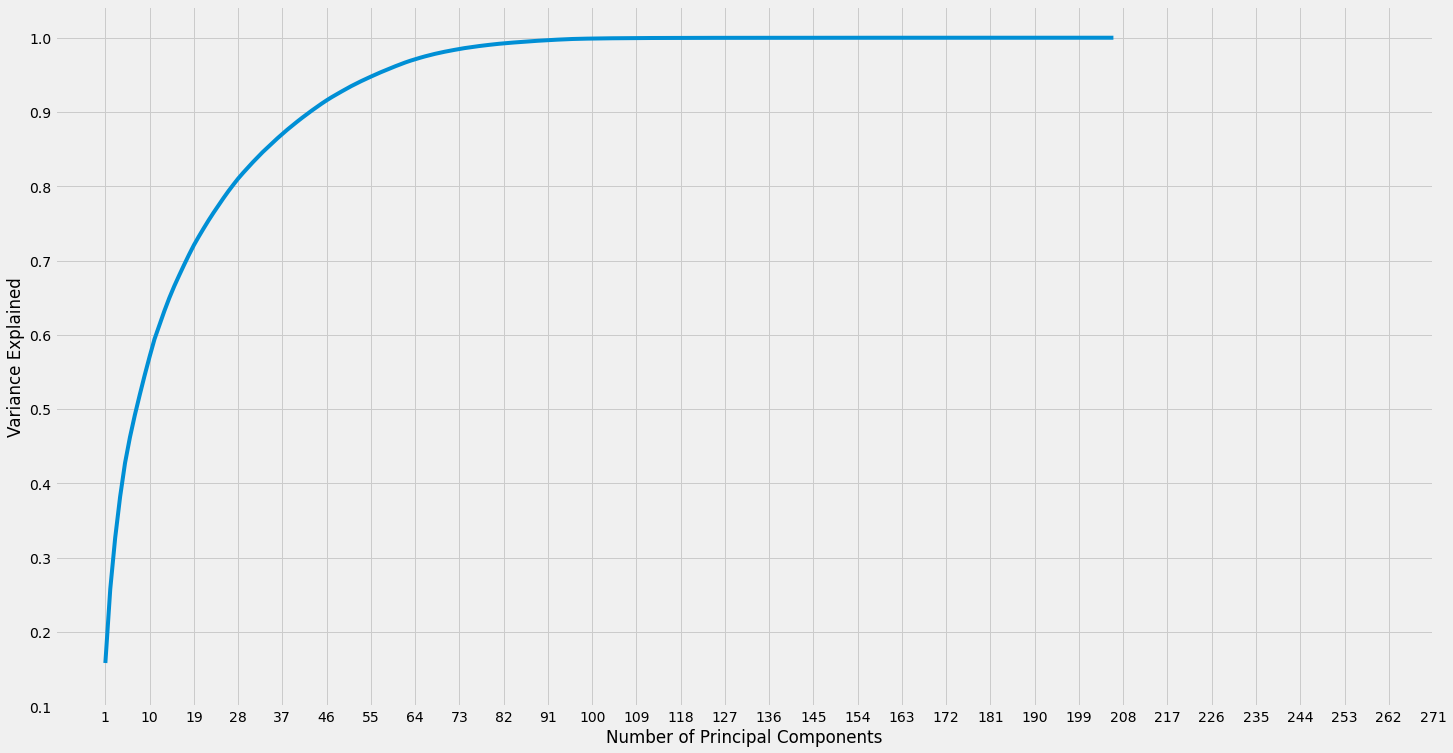

In [ ]:
# Plotting scree plot
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 22,12
sb.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=np.cumsum(pca.explained_variance_ratio_))
plt.xticks(ticks=range(1,277,9))
plt.yticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show();

In [ ]:
# Checking total explained variance for a particular number of PCs

sum(pca.explained_variance_ratio_[:43])

0.9020325410550502

<strong><font color=green>
- From the cumulative scree plot we can see that anything around 43 features explain 90% of the variance
- So we will be using 43 features for building high performance models

### Using Incremental PCA for efficient memory usage

In [ ]:
# Initiating Incremental PCA

ipca = IncrementalPCA(n_components=43)

- **Fitting and transforming the train data set using IPCA**

In [ ]:
# Fitting and transforming Incremental PCA

ipca_train = ipca.fit_transform(X_train_pca)

In [ ]:
# Checking the shape

ipca_train.shape

(21007, 43)

- **Transforming the test data set using IPCA**

In [ ]:
# Transforming the test set using IPCA

ipca_test = ipca.transform(X_test_pca)

In [ ]:
# Checking shape of the resultant test data set

ipca_test.shape

(9004, 43)

### Applying various models(5 Models) to the Principal Components

- **`Using Logistic Regression` - Base Model**

In [ ]:
logreg_ipca = LogisticRegression(max_iter=1000, class_weight='balanced')

In [ ]:
logreg_ipca_model = logreg_ipca.fit(X_train_pca, y_train)

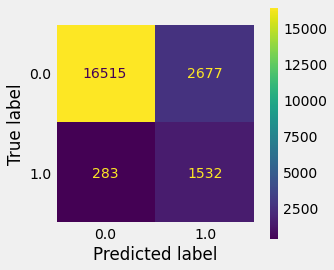

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=logreg_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Logistic Regression default model on train data set
- True Negatives = 16515, True Positives = 1532, False Positives = 2677, False Negatives = 283

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, logreg_ipca_model.predict(X_train_pca))

0.8590945875184463

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, logreg_ipca_model.predict(X_train_pca))

0.8440771349862259

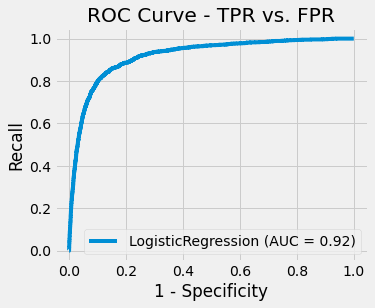

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 5,4
plot_roc_curve(estimator=logreg_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Logistic Regression default model is 0.92, this looks good
- This model has `accuracy = 0.85`, `Recall = 0.84` on train data set

- **`Using Logistic Regression` - Randomized Search Model**

In [ ]:
%%time
# Performing randomized Search on the train data set using Logistic Regression as the estimator

rs_logreg = LogisticRegression(class_weight='balanced', random_state=42)

param = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 50.0, 100.0],
        'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter':[100,200,300,500,1000,5000]}


rs_logreg_model = RandomizedSearchCV(estimator=rs_logreg,
                      param_distributions=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1,
                      random_state=42)

rs_logreg_model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.4s finished


CPU times: user 1.38 s, sys: 240 ms, total: 1.62 s
Wall time: 33.8 s


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                              5.0, 10.0, 15.0, 20.0, 25.0, 30.0,
                                              50.0, 100.0],
                                        'max_iter': [100, 200, 300, 500, 1000,
                                                     5000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [ ]:
# Checking the best parameters chosen by randomized search model

rs_logreg_model.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 5000, 'C': 0.01}

In [ ]:
# Building the model again with best parameters from randomized search

rs_logreg_ipca_model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, C= 0.01)
rs_logreg_ipca_model.fit(X_train_pca, y_train)

LogisticRegression(C=0.01, max_iter=500)

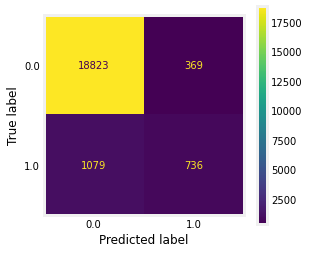

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_logreg_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Logistic Regression Randomized Search model on train data set
- True Negatives = 18823, True Positives = 736, False Positives = 369, False Negatives = 1079

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rs_logreg_ipca_model.predict(X_train_pca))

0.9310705955157804

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rs_logreg_ipca_model.predict(X_train_pca))

0.40550964187327826

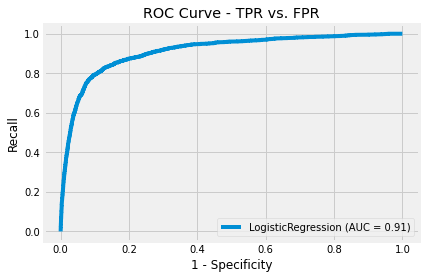

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_logreg_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Logistic Regression Randomized Search model is 0.91, this looks good
- This model has `accuracy = 0.93`, `Recall = 0.40` on train data set

- **Predicting the Test data set**

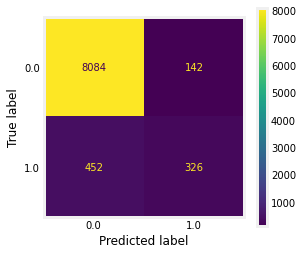

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_logreg_ipca_model,  X=X_test_pca, y_true=y_test, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Logistic Regression Randomized Search model on test data set
- True Negatives = 8084, True Positives = 326, False Positives = 142, False Negatives = 452

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_test, rs_logreg_ipca_model.predict(X_test_pca))

0.934029320302088

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_test, rs_logreg_ipca_model.predict(X_test_pca))

0.4190231362467866

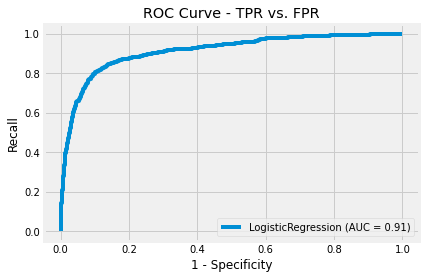

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_logreg_ipca_model, X=X_test_pca, y=y_test)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Logistic Regression Randomized Search model is 0.91, this looks good
- This model has `accuracy = 0.93`, `Recall = 0.40` on test data set, recall is very bad

- **`Using Random Forest Classifier` - Base Model**

In [ ]:
rf_ipca = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
rf_ipca_model = rf_ipca.fit(X_train_pca, y_train)

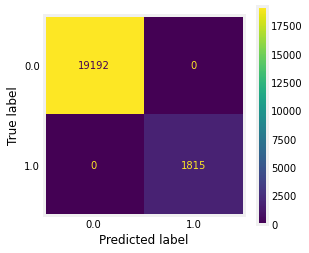

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rf_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Random Forest Classifier default model on train data set
- True Negatives = 19192, True Positives = 1815, False Positives = 0, False Negatives = 0
- It seems this model is overfitting, we will be using randomized search for hyper parameter tuning

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rf_ipca_model.predict(X_train_pca))

1.0

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rf_ipca_model.predict(X_train_pca))

1.0

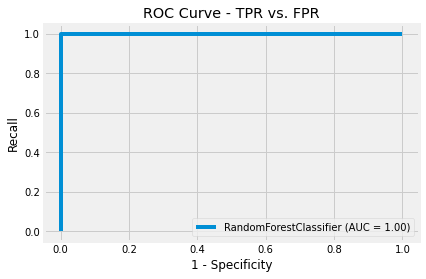

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rf_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Random Forest Classifier default model is 1.00, it is clear case of model overfitting
- This model has `accuracy = 1.00`, `Recall = 1.00` on train data set

- **`Using Random Forest Classifier` - Randomized Search Model**

In [ ]:
%%time
# Performing randomized Search on the train data set using Random Forest Classifier as the estimator

rf = RandomForestClassifier(class_weight='balanced', random_state=0)

param = {'min_samples_split': [5,10,15,20,25,30,35,40,45,50,100,200,300,500],
        'max_depth':[5,10,15,20,25,50,75,100],
        'min_samples_leaf':[5,10,15,20,25,30,35,40,45,50,100,200,300,500],
        'n_estimators':[50,100,200,300,500,1000],
        'criterion':['gini', 'entropy'],
        'max_features':["auto", "sqrt", "log2"]}


rs_rf = RandomizedSearchCV(estimator=rf,
                      param_distributions=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1,
                      random_state=42)

rs_rf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


CPU times: user 6.33 s, sys: 95.9 ms, total: 6.43 s
Wall time: 1min 19s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 50, 75,
                                                      100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             100, 200, 300,
                                                             500],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                            

In [ ]:
# Checking the best parameters chosen by randomized search model

rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 500,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 100,
 'criterion': 'entropy'}

In [ ]:
# Building the model again with best parameters from randomized search

rs_rf_ipca_model = RandomForestClassifier(n_estimators=100, min_samples_split=500,
                                     min_samples_leaf=15, max_features='sqrt',
                                     max_depth=100, criterion='entropy')

rs_rf_ipca_model.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=500)

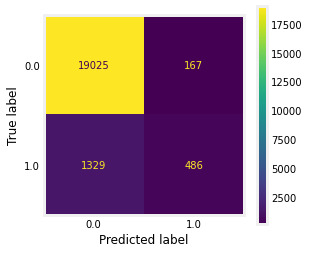

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_rf_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Random Forest Classifier Randomized Search model on train data set
- True Negatives = 19025, True Positives = 486, False Positives = 167, False Negatives = 1329

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rs_rf_ipca_model.predict(X_train_pca))

0.9287856428809445

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rs_rf_ipca_model.predict(X_train_pca))

0.26776859504132233

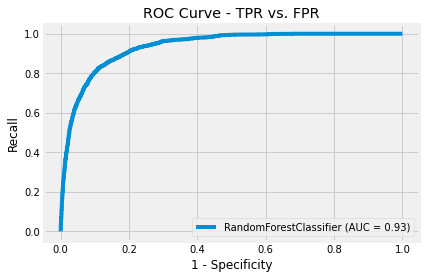

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_rf_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Random Forest Classifier Randomized Search model is 0.93, it looks better
- This model has `accuracy = 0.93`, `Recall = 0.27` on train data set, recall is pretty bad

- **Predicting the Test data set**

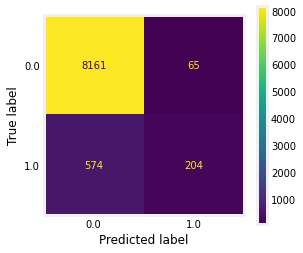

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_rf_ipca_model,  X=X_test_pca, y_true=y_test, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Random Forest Classifier Randomized Search model on test data set
- True Negatives = 8161, True Positives = 204, False Positives = 65, False Negatives = 574

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_test, rs_rf_ipca_model.predict(X_test_pca))

0.9290315415370947

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_test, rs_rf_ipca_model.predict(X_test_pca))

0.2622107969151671

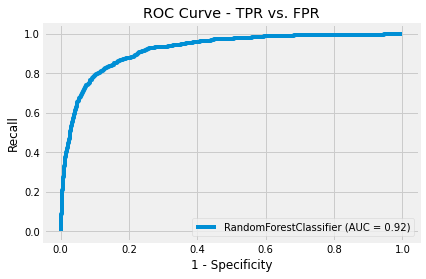

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_rf_ipca_model, X=X_test_pca, y=y_test)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Random Forest Randomized Search model is 0.92, it looks better
- This model has `accuracy = 0.93`, `Recall = 0.26` on test data set, recall is pretty bad

- **`Using Decision Tree Classifier` - Base Model**

In [ ]:
dt_ipca = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
dt_ipca_model = dt_ipca.fit(X_train_pca, y_train)

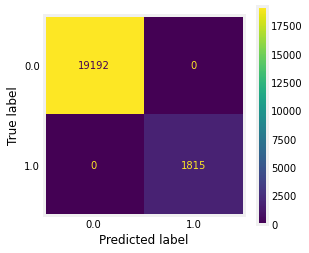

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=dt_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Decision Tree Classifier default model on train data set
- True Negatives = 19192, True Positives = 1815, False Positives = 0, False Negatives = 0
- Even here it seems this model is overfitting, we will be using randomized search for hyper parameter tuning

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, dt_ipca_model.predict(X_train_pca))

1.0

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, dt_ipca_model.predict(X_train_pca))

1.0

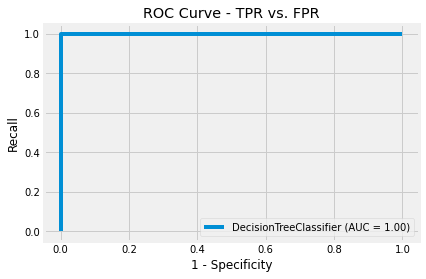

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=dt_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Decision Tree Classifier default model is 1.00, it is clear case of model overfitting
- This model has `accuracy = 1.00`, `Recall = 1.00` on train data set

- **`Using Decision Tree Classifier` - Randomized Search Model**

In [ ]:
%%time
# Performing randomized Search on the train data set using Decision Tree Classifier as the estimator

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param = {'min_samples_split': [5,10,15,20,25,30,35,40,45,50,100,200,300,500],
         'splitter':['best', 'random'],
        'max_depth':[5,10,15,20,25,50,75,100],
        'min_samples_leaf':[5,10,15,20,25,30,35,40,45,50,100,200,300,500],
        'criterion':['gini', 'entropy'],
        'max_features':["auto", "sqrt", "log2"]}


rs_dt = RandomizedSearchCV(estimator=dt,
                      param_distributions=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1,
                      random_state=42)

rs_dt.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


CPU times: user 332 ms, sys: 50.8 ms, total: 383 ms
Wall time: 1.53 s


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 50, 75,
                                                      100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             100, 200, 300,
                                                             500],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                           

In [ ]:
# Checking the best parameters chosen by randomized search model

rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 200,
 'min_samples_leaf': 500,
 'max_features': 'auto',
 'max_depth': 75,
 'criterion': 'entropy'}

In [ ]:
# Building the model again with best parameters from randomized search

rs_dt_ipca_model = DecisionTreeClassifier(splitter='best', min_samples_split=200,
                                     min_samples_leaf=500, max_features='auto',
                                     max_depth=75, criterion='entropy')

rs_dt_ipca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=75, max_features='auto',
                       min_samples_leaf=500, min_samples_split=200)

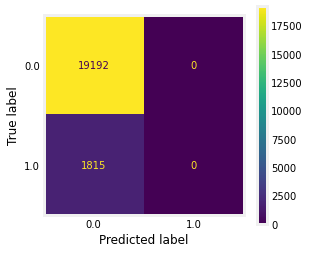

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_dt_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Decision Tree Classifier Randomized Search model on train data set
- True Negatives = 19192, True Positives = 0, False Positives = 0, False Negatives = 1815
- This model is ineffective in predicting the recall even after using Randomized Search

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rs_dt_ipca_model.predict(X_train_pca))

0.9136002284952635

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rs_dt_ipca_model.predict(X_train_pca))

0.0

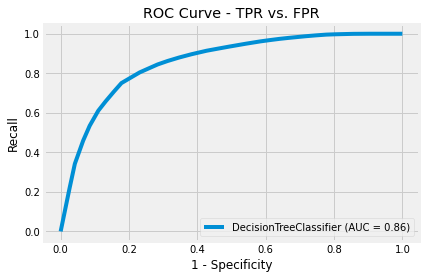

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_dt_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Decision Tree Classifier Randomized Search model is 0.86, it looks better
- This model has `accuracy = 0.91`, `Recall = 0.00` on train data set, recall is worst

- **Predicting the Test data set**

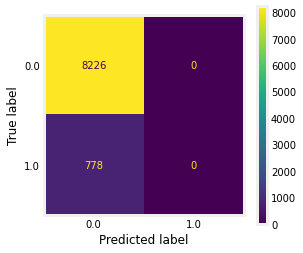

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_dt_ipca_model,  X=X_test_pca, y_true=y_test, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Decision Tree Classifier Randomized Search model on test data set
- True Negatives = 8226, True Positives = 0, False Positives = 0, False Negatives = 778
- This model is ineffective in predicting the recall even after using Randomized Search

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_test, rs_dt_ipca_model.predict(X_test_pca))

0.9135939582407818

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_test, rs_dt_ipca_model.predict(X_test_pca))

0.0

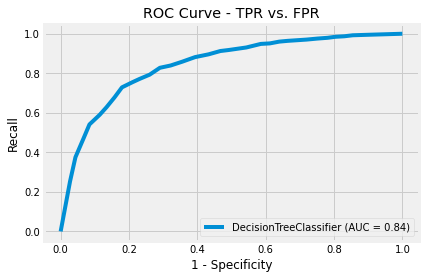

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_dt_ipca_model, X=X_test_pca, y=y_test)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Decision Tree Classifier Randomized Search model is 0.84, it looks good
- This model has `accuracy = 0.91`, `Recall = 0.00` on test data set, recall is worst

- **`Using Support Vector Machines - Classifier` - Base Model**

In [ ]:
svc_ipca = SVC(class_weight='balanced', random_state=42)

In [ ]:
svc_ipca_model = svc_ipca.fit(X_train_pca, y_train)

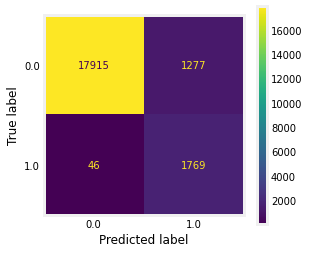

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=svc_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Support Vector Classifier default model on train data set
- True Negatives = 17915, True Positives = 1769, False Positives = 1277, False Negatives = 46
- we will be using randomized search for hyper parameter tuning

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, svc_ipca_model.predict(X_train_pca))

0.9370209930023325

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, svc_ipca_model.predict(X_train_pca))

0.9746556473829201

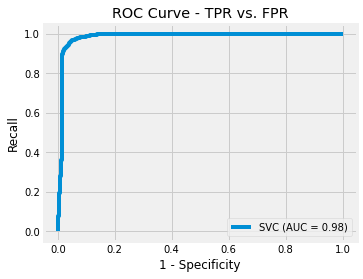

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 5,4
plot_roc_curve(estimator=svc_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Support Vector Classifier default model is 0.98, it seems model is overfitting
- This model has `accuracy = 0.94`, `Recall = 0.97` on train data set

- **`Using Support Vector Machines - Classifier` - Randomized Search Model**

In [ ]:
%%time
# Performing randomized Search on the train data set using Support Vector Classifier as the estimator

svc = SVC(class_weight='balanced', random_state=42)

param = {'C':[0.0001,0.001,0.01,1,10,100,1000],
         'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000]}


rs_svc = RandomizedSearchCV(estimator=svc,
                      param_distributions=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1,
                      random_state=42)

rs_svc.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.7min finished


CPU times: user 43.5 s, sys: 308 ms, total: 43.8 s
Wall time: 22min 26s


RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1, 10, 100,
                                              1000],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [ ]:
# Checking the best parameters chosen by randomized search model

rs_svc.best_params_

{'gamma': 0.001, 'C': 10}

In [ ]:
# Building the model again with best parameters from randomized search

rs_svc_ipca_model = SVC(gamma=0.001, C= 10)

rs_svc_ipca_model.fit(X_train_pca, y_train)

SVC(C=10, gamma=0.001)

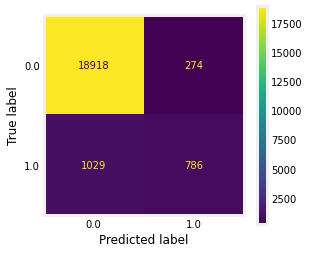

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_svc_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Support Vector Classifier Randomized Search model on train data set
- True Negatives = 18918, True Positives = 786, False Positives = 274, False Negatives = 1029

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rs_svc_ipca_model.predict(X_train_pca))

0.9379730566001809

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rs_svc_ipca_model.predict(X_train_pca))

0.43305785123966944

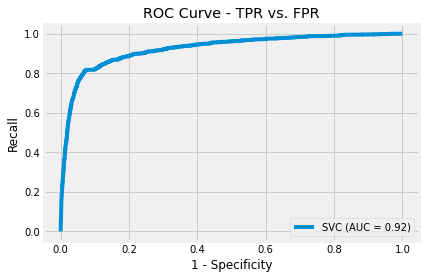

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_svc_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Support Vector Classifier Randomized Search model is 0.92, it looks better
- This model has `accuracy = 0.93`, `Recall = 0.43` on train data set, recall is not good

- **Predicting the Test data set**

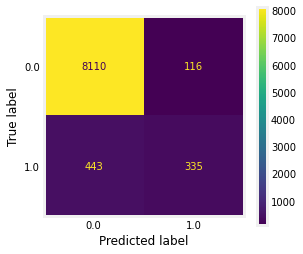

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_svc_ipca_model,  X=X_test_pca, y_true=y_test, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- Support Vector Classifier Randomized Search model on test data set
- True Negatives = 8110, True Positives = 335, False Positives = 116, False Negatives = 443

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_test, rs_svc_ipca_model.predict(X_test_pca))

0.9379164815637494

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_test, rs_svc_ipca_model.predict(X_test_pca))

0.4305912596401028

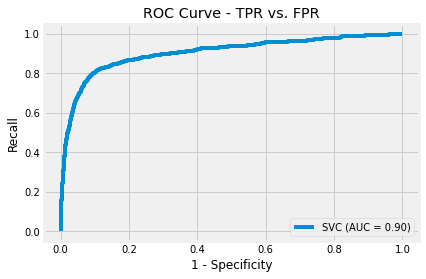

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_svc_ipca_model, X=X_test_pca, y=y_test)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for Support Vector Classifier Randomized Search model is 0.90, it looks good
- This model has `accuracy = 0.93`, `Recall = 0.43` on test data set, recall is not good
- Randomized model is giving similar accuracy and recall on test data set as well

- **`Using XGBoost Classifier` - Base Model**

In [ ]:
xgb_ipca = XGBClassifier(scale_pos_weight=10.57)

In [ ]:
xgb_ipca_model = xgb_ipca.fit(X_train_pca, y_train)

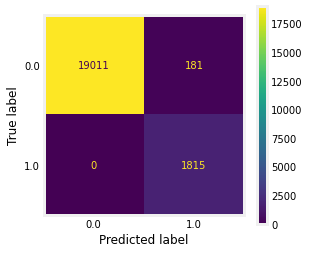

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=xgb_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- XGBoost Classifier default model on train data set
- True Negatives = 19011, True Positives = 1815, False Positives = 181, False Negatives = 0
- We will be using randomized search for hyper parameter tuning

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_train, xgb_ipca_model.predict(X_train_pca))

0.9913838244394726

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_train, xgb_ipca_model.predict(X_train_pca))

1.0

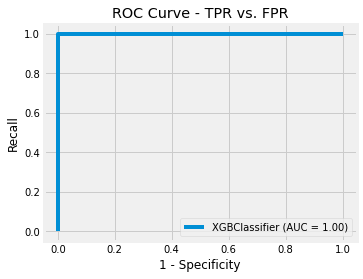

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 5,4
plot_roc_curve(estimator=xgb_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for XGBoost Classifier default model is 1.00, it is clear case of model overfitting
- This model has `accuracy = 0.99`, `Recall = 1.00` on train data set

- **`Using XGBoost Classifier` - Randomized Search Model**

In [ ]:
%%time
# Performing Grid Search on the train data set using XGBoost as the estimator

rs_xgb = XGBClassifier(scale_pos_weight=6)

param = {'learning_rate': [0.0001,0.001,0.01,0.1,0.2,0.3,0.9,1.0,10,100,1000],
        'max_depth':[5,10,15,20,25,50,75,100],
        'min_child_weight':[20,25,30,35,40,45,50,100],
        'n_estimators':[50,100,200,300,500,1000]}


rs_xgb = RandomizedSearchCV(estimator=rs_xgb,
                      param_distributions=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1)

rs_xgb.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.3min finished


CPU times: user 1min 50s, sys: 796 ms, total: 1min 51s
Wall time: 14min 34s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None, scale_pos_weight=6,
                                           subsample=None, tree_method=None,
                        

In [ ]:
# Checking the best parameters chosen by randomized search model

rs_xgb.best_params_

{'n_estimators': 1000,
 'min_child_weight': 25,
 'max_depth': 20,
 'learning_rate': 100}

In [ ]:
# Building the model again with best parameters from randomized search

rs_xgb_ipca_model = XGBClassifier(n_estimators=1000,
                                 min_child_weight=25,
                                 max_depth=20,
                                 learning_rate=100,
                                 scale_pos_weight=10.57)

rs_xgb_ipca_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=100, max_delta_step=0, max_depth=20,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.57, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

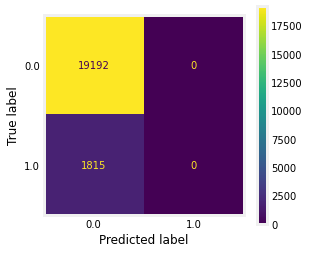

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_xgb_ipca_model, X=X_train_pca, y_true=y_train, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- XGBoost Classifier Randomized Search model on train data set
- True Negatives = 19192, True Positives = 0, False Positives = 0, False Negatives = 1815
- Even with the Randomized Search parameters the model is ineffective in predicting recall

In [ ]:
# Checking 'Accuracy' on the train data

accuracy_score(y_train, rs_xgb_ipca_model.predict(X_train_pca))

0.9136002284952635

In [ ]:
# Checking 'Recall' on the train data

recall_score(y_train, rs_xgb_ipca_model.predict(X_train_pca))

0.0

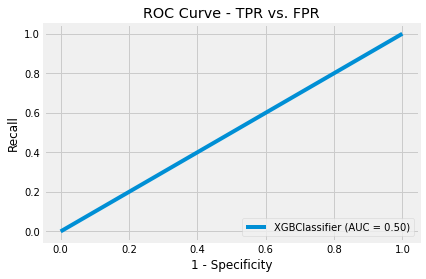

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_xgb_ipca_model, X=X_train_pca, y=y_train)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for XGBoost Classifier Randomized Search model is 0.50, which equal to random guess
- This model has `accuracy = 0.91`, `Recall = 0.00` on train data set, recall is worst
- Even with the Randomized Search parameters the model is performing no better than random guess

- **Predicting the Test data set**

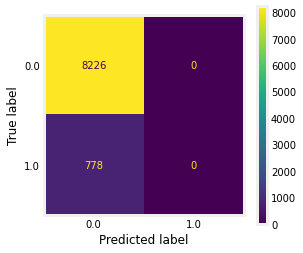

In [ ]:
# Plotting confusion matrix

rcParams['figure.figsize'] = 4,4
plot_confusion_matrix(estimator=rs_xgb_ipca_model,  X=X_test_pca, y_true=y_test, values_format='d')
plt.grid([])
plt.show();

<strong><font color=green>
- XGBoost Classifier Randomized Search model on test data set
- True Negatives = 8226, True Positives = 0, False Positives = 0, False Negatives = 778
- Even with the Randomized Search parameters the model is ineffective in predicting recall

In [ ]:
# Checking 'Accuracy' on the test data

accuracy_score(y_test, rs_xgb_ipca_model.predict(X_test_pca))

0.9135939582407818

In [ ]:
# Checking 'Recall' on the test data

recall_score(y_test, rs_xgb_ipca_model.predict(X_test_pca))

0.0

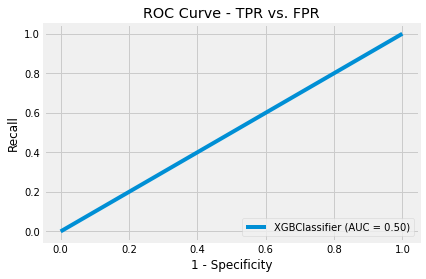

In [ ]:
# Plot ROC curve along with AUC score

rcParams['figure.figsize'] = 6,4
plot_roc_curve(estimator=rs_xgb_ipca_model, X=X_test_pca, y=y_test)
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.title('ROC Curve - TPR vs. FPR')
plt.show();

<strong><font color=green>
- AUC for XGBoost Classifier Randomized Search model is 0.50, which equal to random guess
- This model has `accuracy = 0.91`, `Recall = 0.00` on test data set, recall is worst
- Even with the Randomized Search parameters the model is performing no better than random guess

<strong><font color=green>
- ***Inferences for High Performance Models:***
- All models are performing poorly when it comes to predicting Recall after performing PCA, one of the reasons may be that we need more data points for classifying whether a customer will churn or not churn
- From all the models the `best recall score` on `test data` set is given by `Support Vector Classifier` of `0.43`
- On the contrary to the interpretable model, XGBoost is performing very poorly after performing PCA on the data set, it has been ineffective in predict recall along with Decision Tree Classifier
- Even with Randomized Search parameters the the models did not perform as expected
- At least for this data set performing PCA did not yield desired results

<strong><font color=green>

# Conclusion:
<br>

- ***Inferences for Interpretable Model:***
- We will be concentrating more on Recall because avoiding type 2 error (actually customers churned but our model predicted them as they will not churn) is critical for us, if in the process we predict not churn to be churn that that willnot have adverse impact on the company
- We have taken threshold of 0.4 and we are getting `accuracy = 0.80`, `Recall = 0.90` on test data set, which is good
- This means the grid search xgboost model is not overfitting and performing well on the test data set
- Top 5 features according to xgb_model are `arpu_diff = 0.321`, `total_rech_amt_diff = 0.219`, `roam_og_mou_8 = 0.075`,  `roam_ic_mou_8 = 0.067`, `last_day_rech_amt = 0.064`
<br>    

- ***Recommendations for the Company:***
- As per the XGBoost model with Grid Search parameters, the top 5 features i.e. arpu_diff, total_rech_amt_diff, roam_og_mou_8, roam_ic_mou_8 and last_day_rech_amt are vital in predicting the classes 'Churn' and 'Not Churn'
- For Classifying the 'Churn' and 'Not Churn' classes threshold of 0.4 is optimal which gives `Recall of 0.90` on test data set
- Two of the derived variables `arpu_diff` and `total_rech_amt_diff` are useful in understanding change in the customer behaviour in the `Action` phase i.e. to identifying high-churn-risk customers in this phase
- Going forward we need to include the mentioned top 5 features(these also include 2 derived variables) while predicting the churn